# SAPHIRES - Coude Spectra and the BF!

### This is a demo showing how to manipulate the McDonald 2.7m Coude spectra we have for the SSG/RS CVn candidates within the SAPHIRES framework written by Ben Tofflemire and Emily Leiner

# The Data
### Data for each SSG is contained in a folder named for the star (e.g. V846Her). Each folder contains both the reduced spectra and the some SAPHIRES data products (SAPHIRES is a python package we will be using for spectral analysis and will install below). 

### Reduced: A spectrum for each night the target was observed (starname_date_nightlyindex.pkl; this is a python pickle) and an associated .ls file. The .ls file is used to read the spectrum into saphires, it tells saphires which orders and what parts of a given order to consider. This .pkl file has the full spectrum. If you are interested in an emission line you have to look here, but the data products below have most of the specrtum and a lot of other useful things, like the pre-comupted BF. You may not need to mess with these files, depending on your use case. 

### Data Products: For each epoch there is a .p file that has been run through the saphires framework and has a precomputed BF for the orders we've considered (starname_date_nightlyindex_tempteff_templogg.p; this is a python pickle). 

### Others: There is also a .dat file which lists all the observations and important information about the time the target was observed. 

### Finally, there is a synthetic model template in each folder that I used to compute the broadening function (BF). I'm including this for repeatability. 












### Before we get started, we will need to install the package SAPHIRES, which provides functions to analyze spectra. If installing locally on your machine, saphires is pip installable. You may need to install some saphires dependencies as well. Below is a pip install command to install saphires as well as barycorrpy, emcee, and corner, all packages saphires needs to run. You can run this command in Jupyter, or execute it in the terminal (without the !). 

### If you wish to run in colab this step will be a bit more complicated because colab does not support interactive plotting functionality. We do not need SAPHIRES installed for this week's analysis, but we WILL need it next week. I will post instructions on using SAPHIRES in colab on blackboard, but you might consider getting your local install of anaconda/Jupyter working before then if you have not yet. 

In [1]:
#import packages. 
#Note that if you get an error when importing saphires that certain packages are not found, 
#you'll need to pip install them as well
import numpy as np
import os
from scipy.optimize import curve_fit
import matplotlib
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import pickle as pkl
from scipy.ndimage import gaussian_filter
import scipy
%matplotlib inline 

In [2]:
#Constants
R_coude = 60000.0 #spectral resolution of the Coude. 
c = (2.9979245*10**5) #speed of light

In [3]:
#Load files
star = 'FNCom'
path = 'D:\SSGs\stars' + "\\" + star + "\\"#insert path name

 #insert name of star 

datfile = path + star + '_coude_head.dat'

print(datfile)

D:\SSGs\stars\FNCom\FNCom_coude_head.dat


In [4]:
#Opens and Reads Data
with open(datfile, 'r') as file:
    tempList_data = []
    for line in file:
        temp = line.strip()
        dataList = temp.split(",")
        tempList_data.append(dataList)  
        
del tempList_data[0]  #Removes 1st row      
data = np.array(tempList_data) 

#Number of files
numFiles = len(data)

files = data[:,0]
BJDs = np.array(data[:,5], dtype = float)

date = []

for i in range (len(files)):
    print(files[i])
    temp = files[i].split("_")
    date.append(temp[1])
print(numFiles)

FNCom_2019-12-06_0.pkl
FNCom_2020-05-10_0.pkl
FNCom_2020-07-12_0.pkl
FNCom_2020-12-04_0.pkl
FNCom_2021-01-31_0.pkl
FNCom_2021-02-01_0.pkl
FNCom_2021-03-30_0.pkl
FNCom_2021-03-31_0.pkl
FNCom_2021-04-23_0.pkl
FNCom_2021-04-24_0.pkl
FNCom_2021-05-02_0.pkl
FNCom_2021-05-29_0.pkl
FNCom_2021-05-30_0.pkl
13


In [5]:
file = path + files[0]
file2 = path + files[1]
file3 = path + files[2]

file4 = path + files[3]
file5 = path + files[4]
file6 = path + files[5]


file7 = path + files[6]
file8 = path + files[7]
file9 = path + files[8]

file10 = path + files[9]
file11 = path + files[10]
file12 = path + files[11]


### 1) First, lets take a look at the reduced spectrum for a star. There will be several different observations of your star-- just pick one observations to stars. Below, I will show an example of how to read in and look at a spectrum for the example star V846Her. You should adapt the code as necessary to look at your assigned star. 

In [6]:
spec = pkl.load(open(file,'rb'))
spec2 =  pkl.load(open(file2,'rb'))
spec3 = pkl.load(open(file3,'rb'))

spec4 = pkl.load(open(file4,'rb'))
spec5 =  pkl.load(open(file5,'rb'))
spec6 = pkl.load(open(file6,'rb'))

spec7 = pkl.load(open(file7,'rb'))
spec8 =  pkl.load(open(file8,'rb'))
spec9 = pkl.load(open(file9,'rb'))

spec10 = pkl.load(open(file10,'rb'))
spec11 =  pkl.load(open(file11,'rb'))
spec12 = pkl.load(open(file12,'rb'))

In [7]:
#you can see that the file we read in contains wavelength, flux, and object ID
spec.keys()

dict_keys(['wav', 'flux', 'object'])

In [8]:
print(spec['wav'].shape)
#you can see this is a multi-dimensional array, it contains 58 different spectral orders, 
#each with 2048 pixels of wavelength information
for i in range(spec['wav'].shape[0]):
    print(i,spec['wav'][i,0],spec['wav'][i,-1])

(58, 2048)
0 3746.1244398228837 3808.681175877686
1 3787.783477901103 3851.0413353029676
2 3830.370157176806 3894.3287151690765
3 3873.9256832686397 3938.618409428566
4 3918.47716251086 3983.905722969981
5 3964.068775933266 4030.2501873701863
6 4010.733514593139 4077.688043982038
7 4058.5046445684375 4126.261037980733
8 4107.424360240602 4175.995569692632
9 4157.53245899466 4226.926036772146
10 4208.878295188747 4279.126287248767
11 4261.501636887429 4332.6296422829955
12 4315.470523841337 4387.491438120866
13 4370.8127932716525 4443.751972818049
14 4427.576809146054 4501.468513221617
15 4485.845415727334 4560.704739324809
16 4545.681812470393 4621.527825868207
17 4607.120723467743 4683.98357384828
18 4670.242244234701 4748.159290643369
19 4735.117791332803 4814.118458014654
20 4801.815051408281 4881.9181031643275
21 4870.415173797842 4951.662803042545
22 4941.010470241955 5023.424503478888
23 5013.680105980196 5097.314737648805
24 5088.524972470666 5173.389999906424
25 5165.6055999895

### 2) Lets start by looking at the H-alpha line, which has a rest frame wavelength at 6562.8 Angstroms. 

Text(0.5, 0, 'Wavelength (A)')

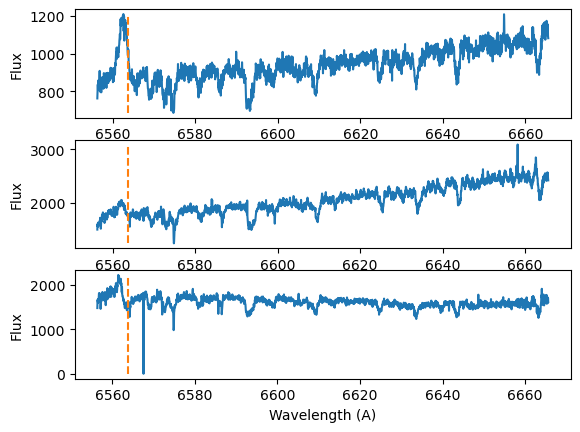

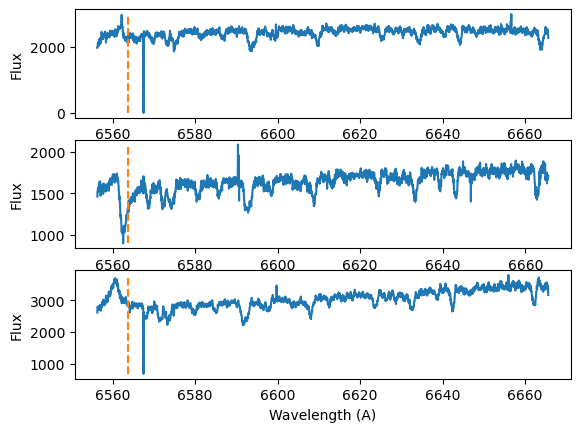

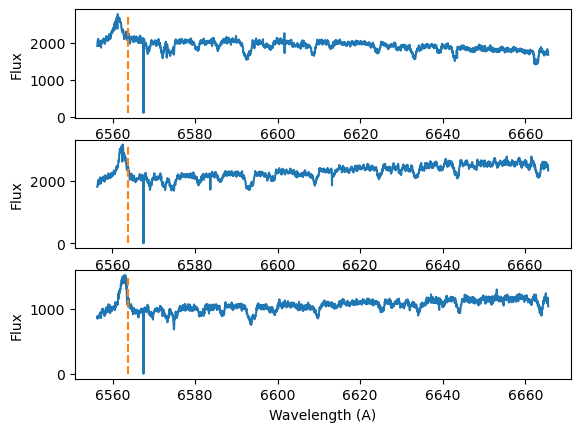

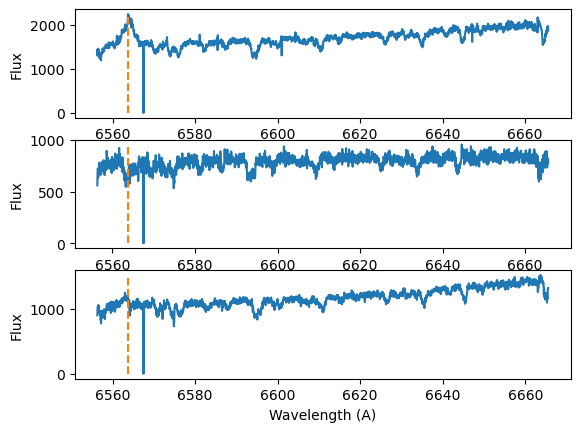

In [9]:
#from above, looks like H-alpha is in order 39
o_ha = 39
l_ha= 6563.8
numFigs = 3
fig,ax = plt.subplots(numFigs)

#figure 1

ax[0].plot(spec['wav'][o_ha],spec['flux'][o_ha])
ax[0].plot([l_ha, l_ha], (min(spec['flux'][o_ha]), max(spec['flux'][o_ha])), '--')
ax[0].set_ylabel('Flux')


ax[1].plot(spec2['wav'][o_ha],spec2['flux'][o_ha])
ax[1].plot([l_ha, l_ha], (min(spec2['flux'][o_ha]), max(spec2['flux'][o_ha])), '--')
ax[1].set_ylabel('Flux')

ax[2].plot(spec3['wav'][o_ha],spec3['flux'][o_ha])
ax[2].plot([l_ha, l_ha], (min(spec3['flux'][o_ha]), max(spec3['flux'][o_ha])), '--')
ax[2].set_ylabel('Flux')


ax[numFigs-1].set_xlabel('Wavelength (A)')

#Figure  2
fig,ax2 = plt.subplots(numFigs)
ax2[0].plot(spec4['wav'][o_ha],spec4['flux'][o_ha])
ax2[0].plot([l_ha, l_ha], (min(spec4['flux'][o_ha]), max(spec4['flux'][o_ha])), '--')
ax2[0].set_ylabel('Flux')

ax2[1].plot(spec5['wav'][o_ha],spec5['flux'][o_ha])
ax2[1].plot([l_ha, l_ha], (min(spec5['flux'][o_ha]), max(spec5['flux'][o_ha])), '--')
ax2[1].set_ylabel('Flux')

ax2[2].plot(spec6['wav'][o_ha],spec6['flux'][o_ha])
ax2[2].plot([l_ha, l_ha], (min(spec6['flux'][o_ha]), max(spec6['flux'][o_ha])), '--')
ax2[2].set_ylabel('Flux')

ax2[numFigs-1].set_xlabel('Wavelength (A)')

#figure 3
fig,ax3 = plt.subplots(numFigs)
ax3[0].plot(spec7['wav'][o_ha],spec7['flux'][o_ha])
ax3[0].plot([l_ha, l_ha], (min(spec7['flux'][o_ha]), max(spec7['flux'][o_ha])), '--')
ax3[0].set_ylabel('Flux')

ax3[1].plot(spec8['wav'][o_ha],spec8['flux'][o_ha])
ax3[1].plot([l_ha, l_ha], (min(spec8['flux'][o_ha]), max(spec8['flux'][o_ha])), '--')
ax3[1].set_ylabel('Flux')

ax3[2].plot(spec9['wav'][o_ha],spec9['flux'][o_ha])
ax3[2].plot([l_ha, l_ha], (min(spec9['flux'][o_ha]), max(spec9['flux'][o_ha])), '--')
ax3[2].set_ylabel('Flux')

ax3[numFigs-1].set_xlabel('Wavelength (A)')

#Figure 4
fig,ax4 = plt.subplots(numFigs)
ax4[0].plot(spec10['wav'][o_ha],spec10['flux'][o_ha])
ax4[0].plot([l_ha, l_ha], (min(spec10['flux'][o_ha]), max(spec10['flux'][o_ha])), '--')
ax4[0].set_ylabel('Flux')

ax4[1].plot(spec11['wav'][o_ha],spec11['flux'][o_ha])
ax4[1].plot([l_ha, l_ha], (min(spec11['flux'][o_ha]), max(spec11['flux'][o_ha])), '--')
ax4[1].set_ylabel('Flux')

ax4[2].plot(spec12['wav'][o_ha],spec12['flux'][o_ha])
ax4[2].plot([l_ha, l_ha], (min(spec12['flux'][o_ha]), max(spec12['flux'][o_ha])), '--')
ax4[2].set_ylabel('Flux')

''' ax4[3].plot(spec13['wav'][o_ha],spec13['flux'][o_ha])
ax4[3].plot([l_ha, l_ha], (min(spec13['flux'][o_ha]), max(spec13['flux'][o_ha])), '--')
ax4[3].set_ylabel('Flux')'''


ax4[numFigs-1].set_xlabel('Wavelength (A)')

#There should be a strong absorption or emission line close to the rest frame wavelength of H-alpha marked in orange, 
#but it should be red-shifted or blue shifted slightly relative to the rest frame H-alpha line 
#because of the star's radial velocity. If you don't see a clear feature here, try selecting a different observation. 
#Observing conditions will vary between nights and some spectra look better than others. 

(2500.0, 3790.2288432324117)

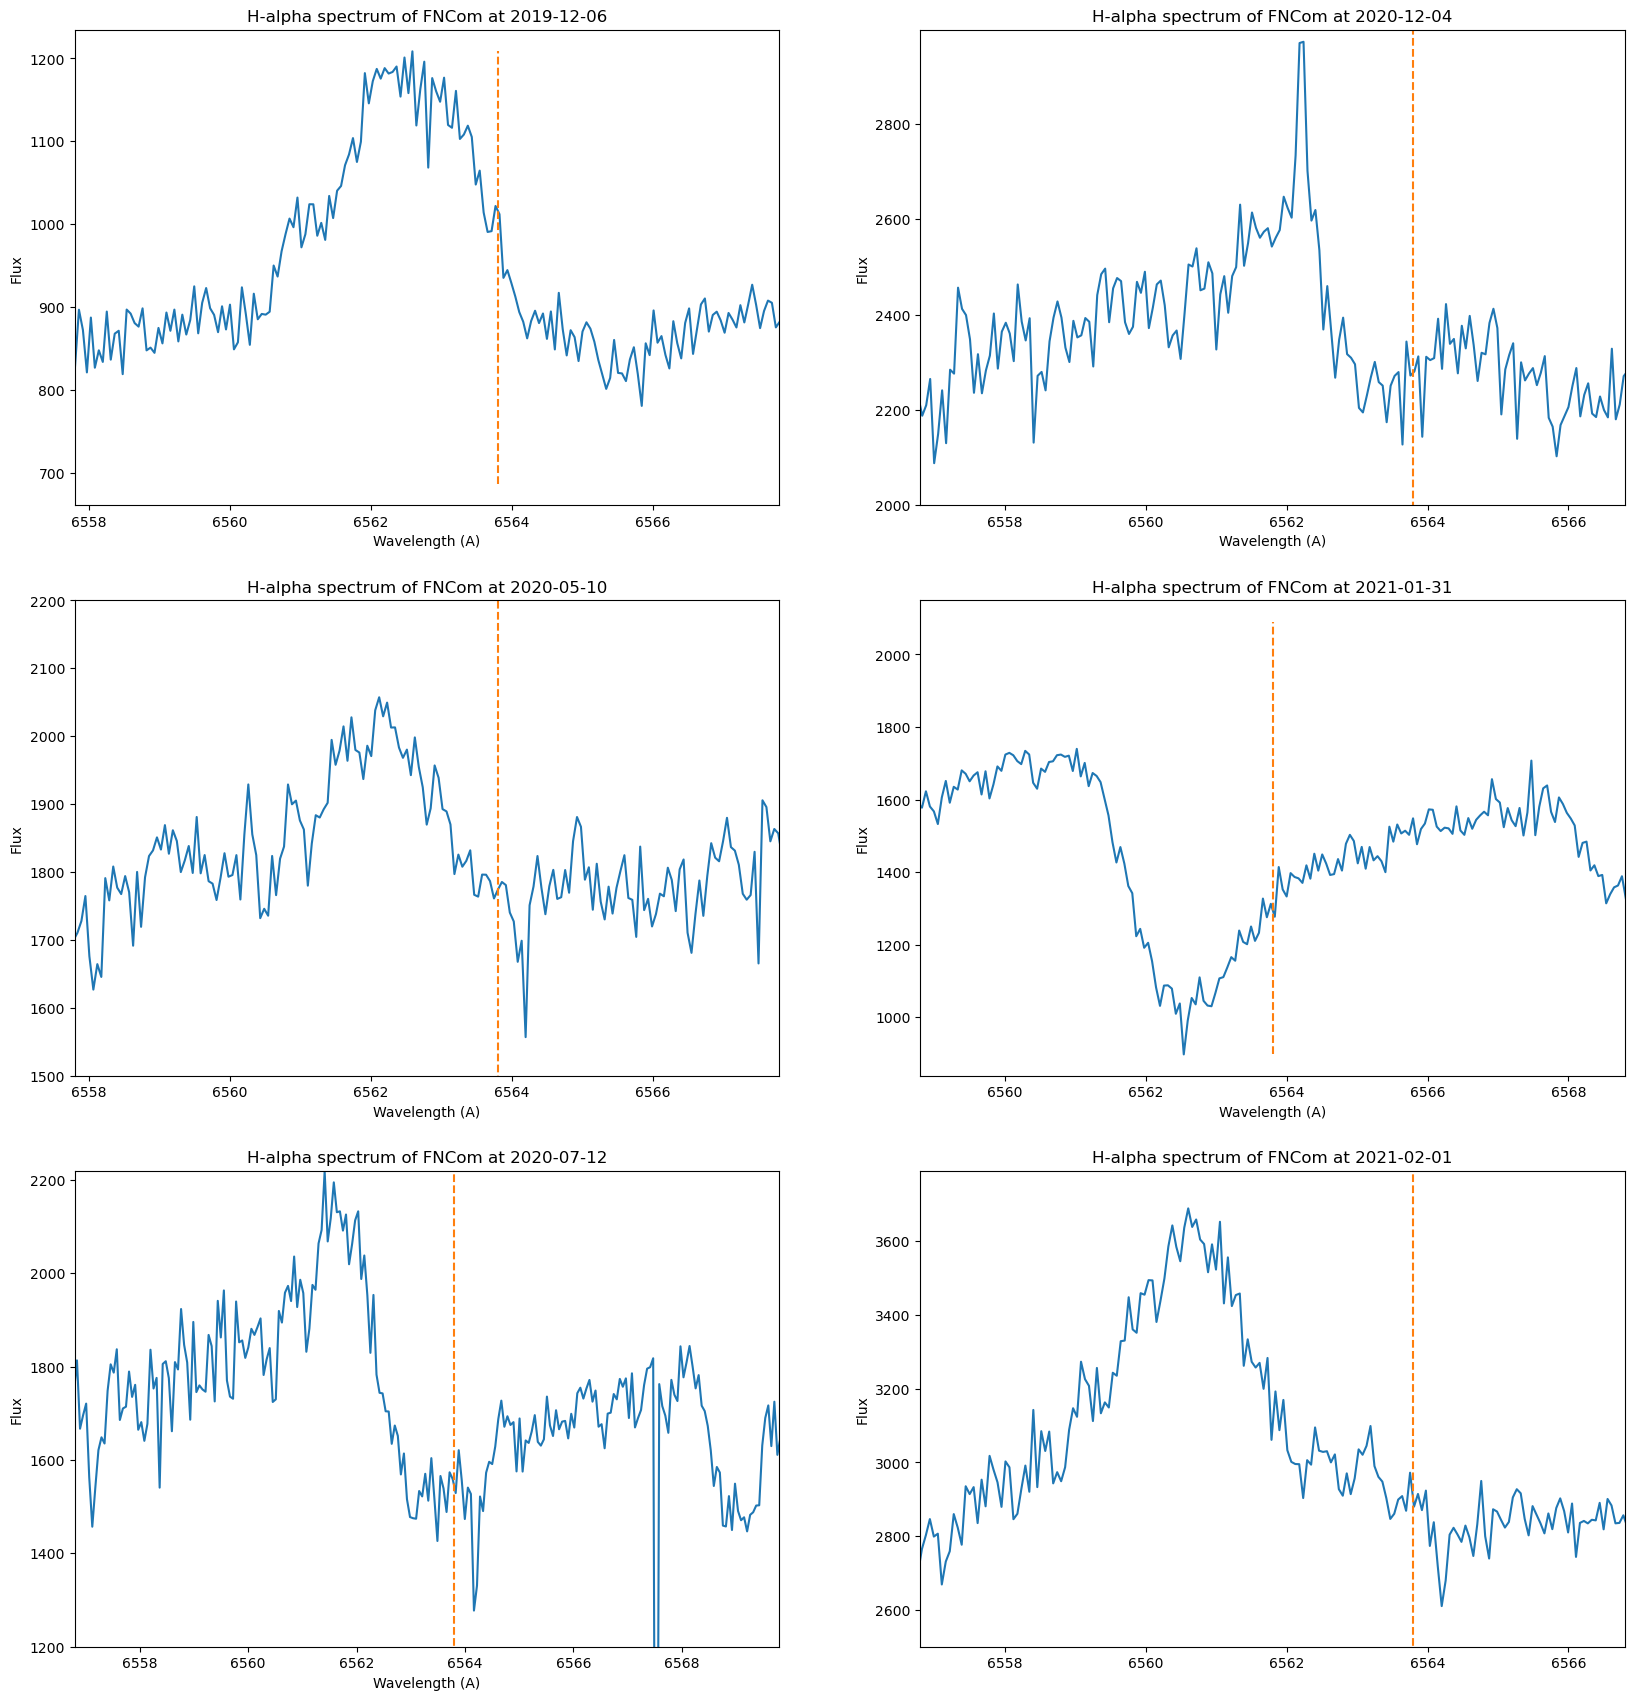

In [10]:
#now zoom in on the H-alpha spectral region

fig,ax = plt.subplots(numFigs, 2, figsize=(20,21))
#ax.title("H-alpha spectrum for FNCom")

ax[0][0].set_title('H-alpha spectrum of FNCom at 2019-12-06')
ax[0][0].plot(spec['wav'][o_ha],spec['flux'][o_ha])
ax[0][0].set_ylabel('Flux')
ax[0][0].plot([l_ha, l_ha], (min(spec['flux'][o_ha]), max(spec['flux'][o_ha])), '--')
ax[0][0].set_xlim(l_ha-6, l_ha+4)
ax[0][0].set_xlabel('Wavelength (A)')

ax[1][0].set_title('H-alpha spectrum of FNCom at 2020-05-10')
ax[1][0].plot(spec2['wav'][o_ha],spec2['flux'][o_ha])
ax[1][0].set_ylabel('Flux')
ax[1][0].plot([l_ha, l_ha], (min(spec2['flux'][o_ha]), max(spec2['flux'][o_ha])), '--')
ax[1][0].set_xlim(l_ha-6, l_ha+4)
ax[1][0].set_ylim(1500, 2200)
ax[1][0].set_xlabel('Wavelength (A)')

ax[2][0].set_title('H-alpha spectrum of FNCom at 2020-07-12')
ax[2][0].plot(spec3['wav'][o_ha],spec3['flux'][o_ha])
ax[2][0].set_ylabel('Flux')
ax[2][0].set_xlim(l_ha-7, l_ha+6)
ax[2][0].plot([l_ha, l_ha], (min(spec3['flux'][o_ha]), max(spec3['flux'][o_ha])), '--')
ax[2][0].set_ylim(1200, max(spec3['flux'][o_ha]))
ax[2][0].set_xlabel('Wavelength (A)')

ax[0][1].set_title('H-alpha spectrum of FNCom at 2020-12-04')
ax[0][1].plot(spec4['wav'][o_ha],spec4['flux'][o_ha])
ax[0][1].set_ylabel('Flux')
ax[0][1].set_xlabel('Wavelength (A)')
ax[0][1].plot([l_ha, l_ha], (min(spec4['flux'][o_ha]), max(spec4['flux'][o_ha])), '--')
ax[0][1].set_xlim(l_ha-7, l_ha+3)
ax[0][1].set_ylim(2000,  max(spec4['flux'][o_ha]))

ax[1][1].set_title('H-alpha spectrum of FNCom at 2021-01-31')
ax[1][1].plot(spec5['wav'][o_ha],spec5['flux'][o_ha])
ax[1][1].set_xlabel('Wavelength (A)')
ax[1][1].set_ylabel('Flux')
ax[1][1].plot([l_ha, l_ha], (min(spec5['flux'][o_ha]), max(spec5['flux'][o_ha])), '--')
ax[1][1].set_xlim(l_ha-5, l_ha+5)

ax[2][1].set_title('H-alpha spectrum of FNCom at 2021-02-01')
ax[2][1].plot(spec6['wav'][o_ha],spec6['flux'][o_ha])
ax[1][1].set_xlabel('Wavelength (A)')
ax[2][1].set_ylabel('Flux')
ax[2][1].set_xlim(l_ha-7, l_ha+3)
ax[2][1].plot([l_ha, l_ha], (min(spec6['flux'][o_ha]), max(spec6['flux'][o_ha])), '--')
ax[2][1].set_ylim(2500, max(spec6['flux'][o_ha]))





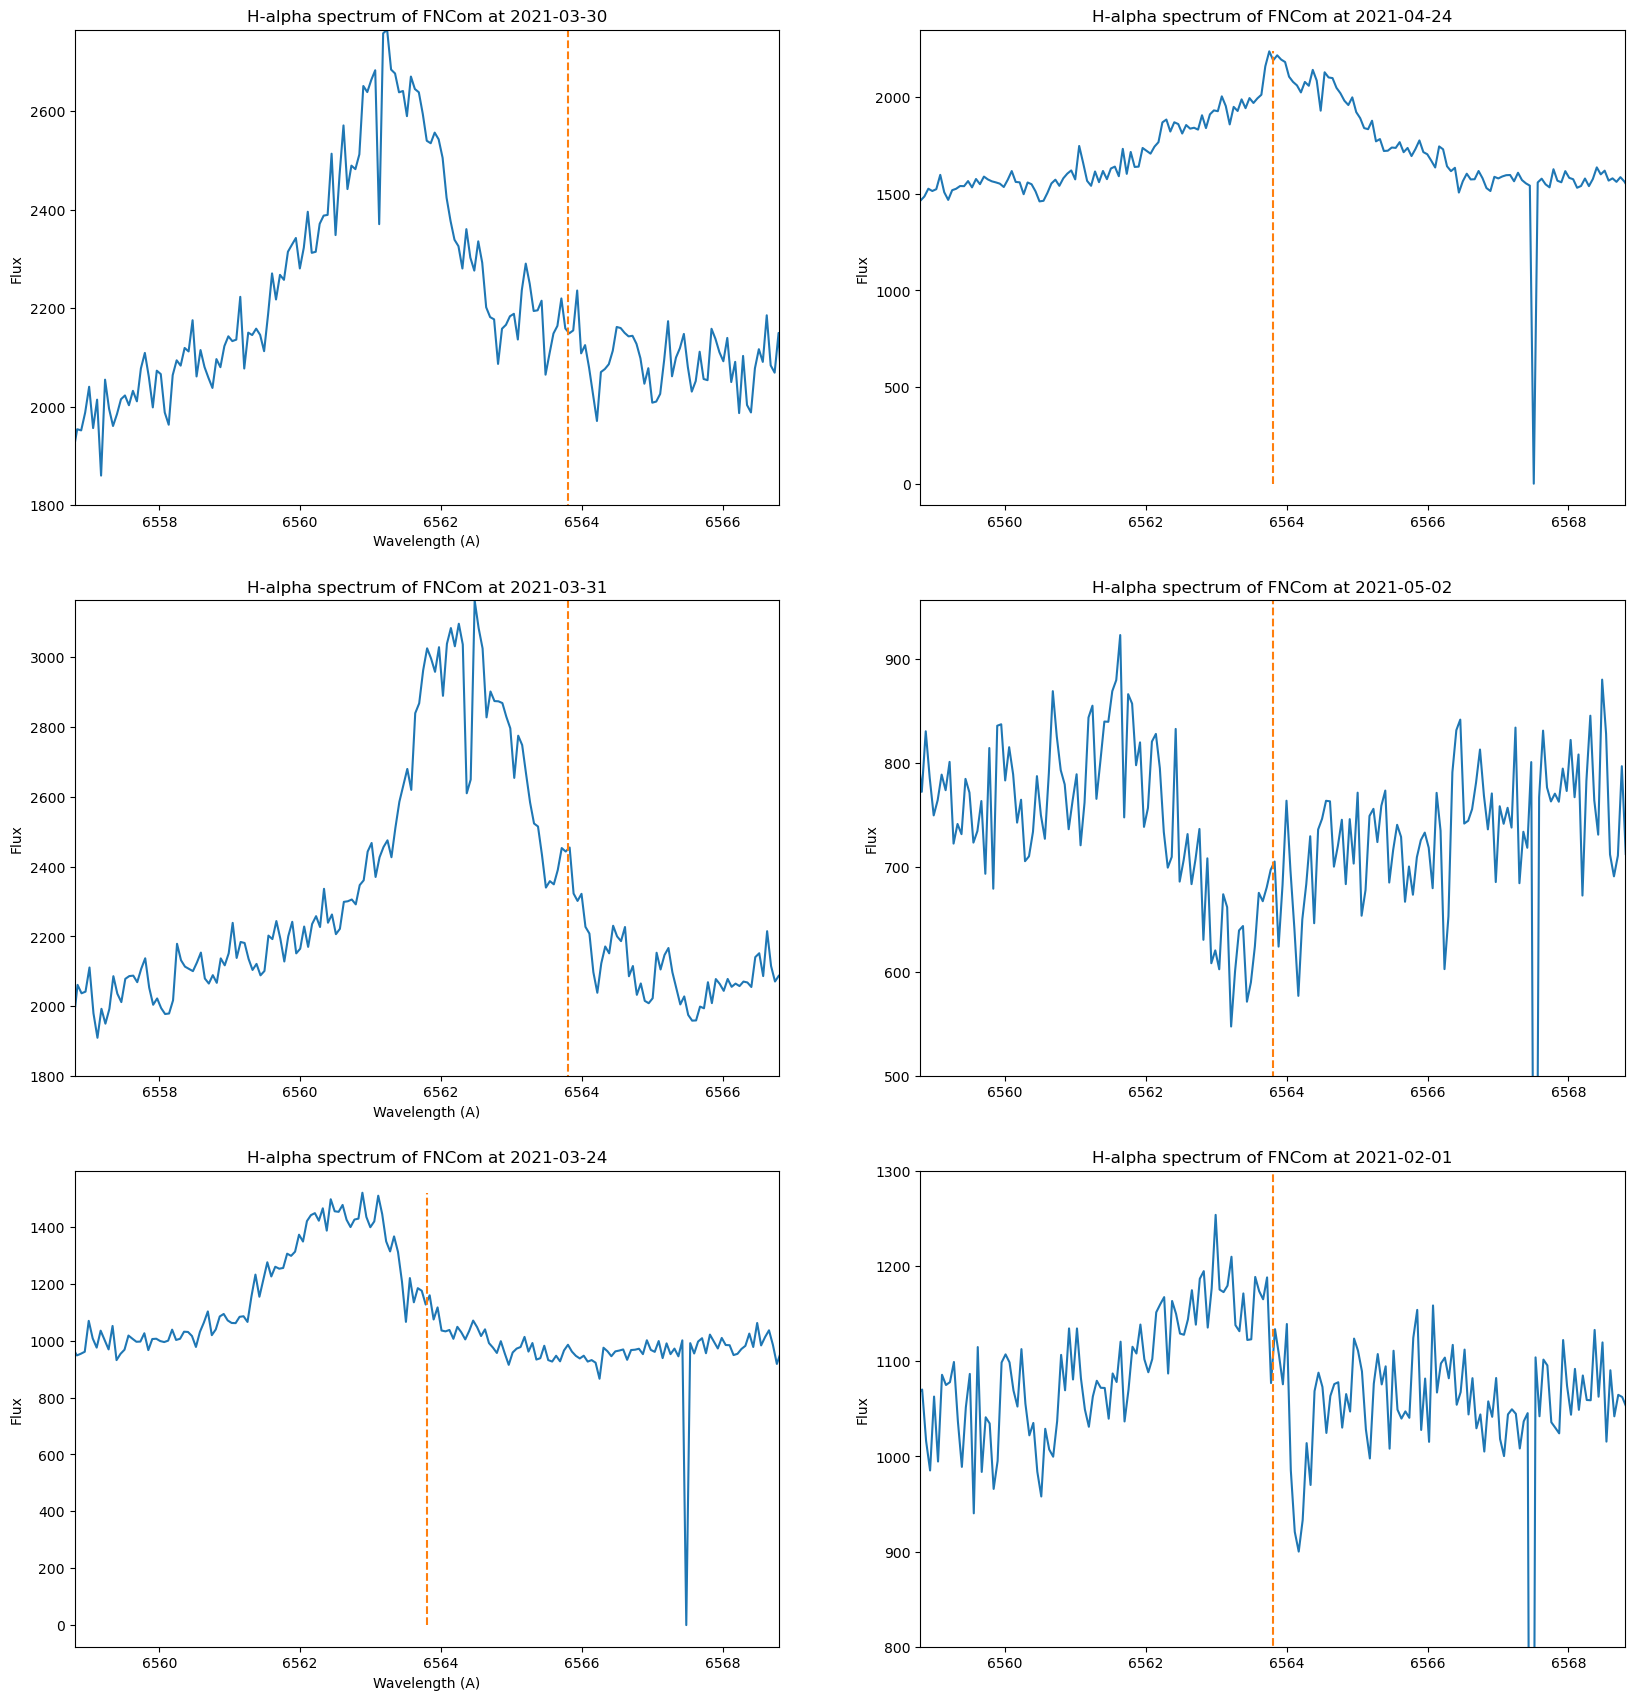

In [11]:
fig,ax2 = plt.subplots(numFigs, 2, figsize=(20,21))

''' 
file7 = path + star + "\FNCom_2021-03-30_0.pkl"
file8 = path + star + "\FNCom_2021-03-31_0.pkl"
file9 = path + star + "\FNCom_2021-04-23_0.pkl"

file10 = path + star + "\FNCom_2021-04-24_0.pkl"
file11 = path + star + "\FNCom_2021-05-02_0.pkl"
file12 = path + star + "\FNCom_2021-05-29_0.pkl"
'''
ax2[0][0].set_title('H-alpha spectrum of FNCom at 2021-03-30')
ax2[0][0].plot(spec7['wav'][o_ha],spec7['flux'][o_ha])
ax2[0][0].set_ylabel('Flux')
ax2[0][0].plot([l_ha, l_ha], (min(spec7['flux'][o_ha]), max(spec7['flux'][o_ha])), '--')
ax2[0][0].set_xlim(l_ha-7, l_ha+3)
ax2[0][0].set_ylim(1800, max(spec7['flux'][o_ha]))
ax2[0][0].set_xlabel('Wavelength (A)')

ax2[1][0].set_title('H-alpha spectrum of FNCom at 2021-03-31')
ax2[1][0].plot(spec8['wav'][o_ha],spec8['flux'][o_ha])
ax2[1][0].set_ylabel('Flux')
ax2[1][0].plot([l_ha, l_ha], (min(spec8['flux'][o_ha]), max(spec8['flux'][o_ha])), '--')
ax2[1][0].set_xlim(l_ha-7, l_ha+3)
ax2[1][0].set_ylim(1800, max(spec8['flux'][o_ha]))
ax2[1][0].set_xlabel('Wavelength (A)')

ax2[2][0].set_title('H-alpha spectrum of FNCom at 2021-03-24')
ax2[2][0].plot(spec9['wav'][o_ha],spec9['flux'][o_ha])
ax2[2][0].set_ylabel('Flux')
ax2[2][0].set_xlim(l_ha-5, l_ha+5)
ax2[2][0].plot([l_ha, l_ha], (min(spec9['flux'][o_ha]), max(spec9['flux'][o_ha])), '--')
ax2[2][0].set_xlabel('Wavelength (A)')

ax2[0][1].set_title('H-alpha spectrum of FNCom at 2021-04-24')
ax2[0][1].plot(spec10['wav'][o_ha],spec10['flux'][o_ha])
ax2[0][1].set_ylabel('Flux')
ax2[0][1].plot([l_ha, l_ha], (min(spec10['flux'][o_ha]), max(spec10['flux'][o_ha])), '--')
ax2[0][1].set_xlim(l_ha-5, l_ha+5)

ax2[1][1].set_title('H-alpha spectrum of FNCom at 2021-05-02')
ax2[1][1].plot(spec11['wav'][o_ha],spec11['flux'][o_ha])
ax2[1][1].set_ylabel('Flux')
ax2[1][1].plot([l_ha, l_ha], (min(spec11['flux'][o_ha]), max(spec11['flux'][o_ha])), '--')
ax2[1][1].set_xlim(l_ha-5, l_ha+5)
ax2[1][1].set_ylim(500, max(spec11['flux'][o_ha]))

ax2[2][1].set_title('H-alpha spectrum of FNCom at 2021-02-01')
ax2[2][1].plot(spec12['wav'][o_ha],spec12['flux'][o_ha])
ax2[2][1].set_ylabel('Flux')
ax2[2][1].set_xlim(l_ha-5, l_ha+5)
ax2[2][1].set_ylim(800, 1300)
ax2[2][1].plot([l_ha, l_ha], (min(spec12['flux'][o_ha]), max(spec12['flux'][o_ha])), '--')




### 3) We want to fit this H-alpha line profile with a gaussian function. To do that, define a function that takes a gaussian function and adds a constant to it (the continuum). 
### $$y= Ae^\frac{-(x-\mu)^2}{2\sigma^2}+B$$
### where $\mu$ is the mean of the gaussian, $\sigma$ is the standard deviation of the gaussian, A is the amplitude, and B is a constant that represents the flux from the stellar continuum.  

In [12]:
#define your gaussian function here by filling in the return statement with your equation
def gauss(x, *p): 
    A, mu, sigma, B = p
    y = A * np.exp(-((x - mu)**2)/(2 * sigma ** 2 )) + B
    return y



### 4) Now we will fit a gaussian to the H-alpha line above. To do this, first cut out a section of the spectral data right around the H-alpha line. You will want to select a wavelength range wide enough that it spans the width of the entire absorption line plus some continuum flux on either side of the line since our function is fitting the continuum level. Then use scipy.optimize.curve_fit() and the function you made above to fit a gaussian to this section of the spectrum. To do this you to pass your x data (wavelength) and y data (flux) to curve_fit, as well as an initial guess for p. 

In [13]:
data_path = "Analyze_" + star + ".txt"
with open(data_path, 'r') as file:
    tempList_data = []
    for line in file:
        temp = line.strip()
        dataList = temp.split(" ")
        dataList = np.array(dataList)
        tempList_data.append(dataList)  
print(tempList_data)

tip = len(tempList_data)

tempList_data = np.array(tempList_data)

[array(['#Star', 'Date', 'EWs', 'Redshifts', 'BVCORR', 'BJDs', 'Limits',
       'Guesses'], dtype='<U9'), array(['FNCom', '2019-12-06', '-0.8691017076674541',
       '6.974825416717465e-05', '28.136', '2458824.008255289',
       '[6557.592075444555,6567.592075444555]',
       '[2250.419395260651,6562.592075444555,1,2958.185592865969]'],
      dtype='<U57'), array(['FNCom', '2020-05-10', '-0.2502037339649048',
       '-2.3449556518184497e-05', '-22.157', '2458979.709228956',
       '[6557.120571036957,6567.120571036957]',
       '[2226.48402805801,6562.120571036957,1,3830.97243376164]'],
      dtype='<U55'), array(['FNCom', '2020-07-12', '-0.44927272661451934',
       '-0.00010387186201653844', '-25.846', '2459042.664186903',
       '[6556.4106113366415,6566.4106113366415]',
       '[2461.214862757891,6561.4106113366415,1,3757.6809710392326]'],
      dtype='<U59'), array(['FNCom', '2020-07-12', '0.33434370472490116',
       '-0.00010387186201653844', '-25.846', '2459042.664186903',
    

In [14]:
'''
guesses = []
lims = []
dates2 = []
ha2 = - 1
lines_ha = []
l_ha2 = l_ha - 1

for i in range(tip-1):
    ha2_1 = ha2
    res = tempList_data[i+1,7].strip('[]').split(",")
    temp = tempList_data[i+1,6].strip('[]').split(",")
    
    days = tempList_data[i+1,1]
    red = float(tempList_data[i+1,3])
    corr = float(tempList_data[i+1,4])
    
    res = np.array(res, dtype = float) #guesses
    temp = np.array(temp, dtype =float) #limits
    dates2.append(days)
    
    ha2 = l_ha2 * ((red - corr/c)+ 1)
    if (ha2 != ha2_1):
        print(ha2)
        lines_ha.append(ha2)
    
    guesses.append(res)
    lims.append(temp)
'''
guesses = []
lims = []
dates2 = []
ha2 = - 1
lines_ha = []
l_ha2 = l_ha - 1
BJD1 = []

for i in range(tip-1):
    ha2_1 = ha2
    res = tempList_data[i+1,7].strip('[]').split(",")
    temp = tempList_data[i+1,6].strip('[]').split(",")
    temp2 = float(tempList_data[i+1,5])
    days = tempList_data[i+1,1]
    red = float(tempList_data[i+1,3])
    corr = float(tempList_data[i+1,4])
    
    res = np.array(res, dtype = float) #guesses
    temp = np.array(temp, dtype =float) #limits
    
    dates2.append(days)
    BJD1.append(temp2)
    
    ha2 = l_ha2 * ((red - corr/c)+ 1)
    ha3 = red*c - corr
    if (ha2 != ha2_1):
        lines_ha.append(ha2)
        RVs.append(ha3)
    
    guesses.append(res)
    lims.append(temp)


In [49]:

redshift_path = 'D:\SSGs\Data3\starstxt3' + '\\' + star + '.txt'
count = 0
RVs = []

with open(redshift_path, 'r') as file:
    d = file.readlines()
print(d)
#print(len(d) - 7)

r = d[1].split(' ')
av_RV = float(r[2])
print(av_RV)

r = d[2].split(' ')
RV_STD = float(r[2])
print(RV_STD)

for i in range(len(d)-7):
    b = d[i+6]
    a = b.strip('[]').split(',')
    if float(BJDs[count]) == float(a[1]):
        RVs.append(float(a[3]))
        #print(a[0], a[1], a[3])
        count = count + 1
print(RVs)

['FNCom\n', 'Avg RV: 1.727692307692307 km/s\n', 'RV STD: 28.825952557173242 km/s\n', 'Vsini: 31.442307692307693 km/s\n', 'Vsini STD: 1.2283644776453064 km/s\n', "['Filename', 'BJD', 'BVCORR', 'RV', 'RV Upper Error', 'RV Lower Error', 'Vsini', 'Vsini Error', 'redshift'],\n", "['FNCom_2019-12-06_0_4500_4.5.p', 2458824.008255289, 28.136, 20.91, 0.19, -0.16, 33.87, 0.14, 6.974825416717465e-05],\n", "['FNCom_2020-05-10_0_4500_4.5.p', 2458979.709228956, -22.157, -7.03, 0.3, -0.22, 31.05, 0.13, -2.3449556518184497e-05],\n", "['FNCom_2020-07-12_0_4500_4.5.p', 2459042.664186903, -25.846, -31.14, 0.2, -0.2, 29.86, 0.09, -0.00010387186201653844],\n", "['FNCom_2020-12-04_0_4500_4.5.p', 2459187.9950586716, 28.008, 49.31, 0.18, -0.19, 31.23, 0.14, 0.00016448045973139084],\n", "['FNCom_2021-01-31_0_4500_4.5.p', 2459245.9085900737, 20.601, -2.88, 0.19, -0.19, 30.2, 0.1, -9.606646198061358e-06],\n", "['FNCom_2021-02-01_0_4500_4.5.p', 2459246.935931229, 20.169, -35.67, 0.15, -0.18, 30.47, 0.15, -0.00011

In [16]:
#Filter Function
def filterer(region, bounds, spect):
    spec_where = np.where((spect['wav'][region]>bounds[0]) & (spect['wav'][region]<bounds[1]))
    tempList_wavelength = spect['wav'][region][spec_where]
    tempList_flux = spect['flux'][region][spec_where]
    '''
    tempList_wavelength = [];
    tempList_flux = [];
    for i in range(len(spect['wav'][region])):
        if spect['wav'][region][i] > bound1 and spect['wav'][region][i] < bound2:
            tempList_wavelength.append(spect['wav'][region][i])
            tempList_flux.append(spect['flux'][region][i])'''
    
    return  tempList_flux,  tempList_wavelength

In [17]:
def filter2(arr, arr2, bounds):
    filt_where = np.where((arr > bounds[0]) & (arr < bounds[1]))
    tempList_wav = arr[filt_where]
    tempList_flux2 = arr2[filt_where]
    return tempList_flux2, tempList_wav

In [18]:
for i in range(len(dates2)):
    print(dates2[i], lims[i], guesses[i])

2019-12-06 [6557.59207544 6567.59207544] [2.25041940e+03 6.56259208e+03 1.00000000e+00 2.95818559e+03]
2020-05-10 [6557.12057104 6567.12057104] [2.22648403e+03 6.56212057e+03 1.00000000e+00 3.83097243e+03]
2020-07-12 [6556.41061134 6566.41061134] [2.46121486e+03 6.56141061e+03 1.00000000e+00 3.75768097e+03]
2020-07-12 [6559.16538843 6569.16538843] [2.48024414e+03 6.56416539e+03 1.00000000e+00 3.75768097e+03]
2020-12-04 [6557.2402915 6567.2402915] [2.58662118e+03 6.56224029e+03 1.00000000e+00 4.38533492e+03]
2021-01-31 [6557.54051525 6567.54051525] [2.55426444e+03 6.56254052e+03 1.00000000e+00 3.45139064e+03]
2021-02-01 [6555.60371938 6565.60371938] [2.60044831e+03 6.56060372e+03 1.00000000e+00 5.08875546e+03]
2021-03-30 [6556.2332391 6566.2332391] [2.51597651e+03 6.56123324e+03 1.00000000e+00 4.24945312e+03]
2021-03-31 [6557.47575932 6567.47575932] [2.81066063e+03 6.56247576e+03 1.00000000e+00 4.35261654e+03]
2021-04-23 [6557.88241021 6567.88241021] [2.41456977e+03 6.56288241e+03 1.000

In [19]:
flux_Ha, wavelength_Ha = filterer(o_ha, lims[0], spec)
popt_Ha, pcov_Ha = scipy.optimize.curve_fit(gauss, wavelength_Ha, flux_Ha,guesses[0])
fit_flux_Ha = gauss(wavelength_Ha, popt_Ha[0], popt_Ha[1], popt_Ha[2], popt_Ha[3])

flux_Ha2, wavelength_Ha2 = filterer(o_ha, lims[1], spec2)
popt_Ha2, pcov_Ha2 = scipy.optimize.curve_fit(gauss, wavelength_Ha2, flux_Ha2,guesses[1])
fit_flux_Ha2 = gauss(wavelength_Ha2, popt_Ha2[0], popt_Ha2[1], popt_Ha2[2], popt_Ha2[3])

flux_Ha3, wavelength_Ha3 = filterer(o_ha, lims[2], spec3)
popt_Ha3, pcov_Ha3 = scipy.optimize.curve_fit(gauss, wavelength_Ha3, flux_Ha3,guesses[2])
fit_flux_Ha3 = gauss(wavelength_Ha3, popt_Ha3[0], popt_Ha3[1], popt_Ha3[2], popt_Ha3[3])

flux_Ha3b, wavelength_Ha3b = filterer(o_ha, lims[3], spec3)
popt_Ha3b, pcov_Ha3b = scipy.optimize.curve_fit(gauss, wavelength_Ha3b, flux_Ha3b,guesses[3])
fit_flux_Ha3b = gauss(wavelength_Ha3b, popt_Ha3b[0], popt_Ha3b[1], popt_Ha3b[2], popt_Ha3b[3])

flux_Ha4, wavelength_Ha4 = filterer(o_ha, lims[4], spec4)
popt_Ha4, pcov_Ha4 = scipy.optimize.curve_fit(gauss, wavelength_Ha4, flux_Ha4,guesses[4])
fit_flux_Ha4 = gauss(wavelength_Ha4, popt_Ha4[0], popt_Ha4[1], popt_Ha4[2], popt_Ha4[3])

flux_Ha5, wavelength_Ha5 = filterer(o_ha, lims[5], spec5)
popt_Ha5, pcov_Ha5 = scipy.optimize.curve_fit(gauss, wavelength_Ha5, flux_Ha5,guesses[5])
fit_flux_Ha5 = gauss(wavelength_Ha5, popt_Ha5[0], popt_Ha5[1], popt_Ha5[2], popt_Ha5[3])

flux_Ha6, wavelength_Ha6 = filterer(o_ha, lims[6], spec6)
popt_Ha6, pcov_Ha6 = scipy.optimize.curve_fit(gauss, wavelength_Ha6, flux_Ha6,guesses[6])
fit_flux_Ha6 = gauss(wavelength_Ha6, popt_Ha6[0], popt_Ha6[1], popt_Ha6[2], popt_Ha6[3])

In [20]:
flux_Ha7, wavelength_Ha7 = filterer(o_ha, lims[7], spec7)
popt_Ha7, pcov_Ha7 = scipy.optimize.curve_fit(gauss, wavelength_Ha7, flux_Ha7,guesses[7])
fit_flux_Ha7 = gauss(wavelength_Ha7, popt_Ha7[0], popt_Ha7[1], popt_Ha7[2], popt_Ha7[3])

flux_Ha8, wavelength_Ha8 = filterer(o_ha, lims[8], spec8)
popt_Ha8, pcov_Ha8 = scipy.optimize.curve_fit(gauss, wavelength_Ha8, flux_Ha8,guesses[8])
fit_flux_Ha8 = gauss(wavelength_Ha8, popt_Ha8[0], popt_Ha8[1], popt_Ha8[2], popt_Ha8[3])

flux_Ha9, wavelength_Ha9 = filterer(o_ha, lims[9], spec9)
popt_Ha9, pcov_Ha9 = scipy.optimize.curve_fit(gauss, wavelength_Ha9, flux_Ha9,guesses[9])
fit_flux_Ha9 = gauss(wavelength_Ha9, popt_Ha9[0], popt_Ha9[1], popt_Ha9[2], popt_Ha9[3])

flux_Ha10, wavelength_Ha10 = filterer(o_ha, lims[10], spec10)
popt_Ha10, pcov_Ha10 = scipy.optimize.curve_fit(gauss, wavelength_Ha10, flux_Ha10,guesses[10])
fit_flux_Ha10 = gauss(wavelength_Ha10, popt_Ha10[0], popt_Ha10[1], popt_Ha10[2], popt_Ha10[3])

flux_Ha11, wavelength_Ha11 = filterer(o_ha, lims[11], spec11)
popt_Ha11, pcov_Ha11 = scipy.optimize.curve_fit(gauss, wavelength_Ha11, flux_Ha11,guesses[11])
fit_flux_Ha11 = gauss(wavelength_Ha11, popt_Ha11[0], popt_Ha11[1], popt_Ha11[2], popt_Ha11[3])

flux_Ha11b, wavelength_Ha11b = filterer(o_ha, lims[12], spec11)
popt_Ha11b, pcov_Ha11b = scipy.optimize.curve_fit(gauss, wavelength_Ha11b, flux_Ha11b,guesses[13])
fit_flux_Ha11b = gauss(wavelength_Ha11b, popt_Ha11b[0], popt_Ha11b[1], popt_Ha11b[2], popt_Ha11b[3])

flux_Ha12, wavelength_Ha12 = filterer(o_ha, lims[13], spec12)
popt_Ha12, pcov_Ha12 = scipy.optimize.curve_fit(gauss, wavelength_Ha12, flux_Ha12,guesses[13])
fit_flux_Ha12 = gauss(wavelength_Ha12, popt_Ha12[0], popt_Ha12[1], popt_Ha12[2], popt_Ha12[3])


In [21]:
fit_flux_Ha3_1, wavelength_Ha3_1 = filter2(wavelength_Ha3, fit_flux_Ha3, [lims[2][0], lines_ha[2]]) #6562.4
fit_flux_Ha3b_1, wavelength_Ha3b_1 = filter2(wavelength_Ha3b, fit_flux_Ha3b, [lines_ha[2], lims[2][1]])
fit_flux_Ha11_1, wavelength_Ha11_1 = filter2(wavelength_Ha11, fit_flux_Ha11, [lims[11][0], 6562.4]) #6562.4
fit_flux_Ha11b_1, wavelength_Ha11b_1 = filter2(wavelength_Ha11b, fit_flux_Ha11b, [6562.4, lims[11][1]])

### 5) To check whether your fit is working well, plot your spectrum zoomed in on the H-alpha region and overplot your best fit gaussian. 

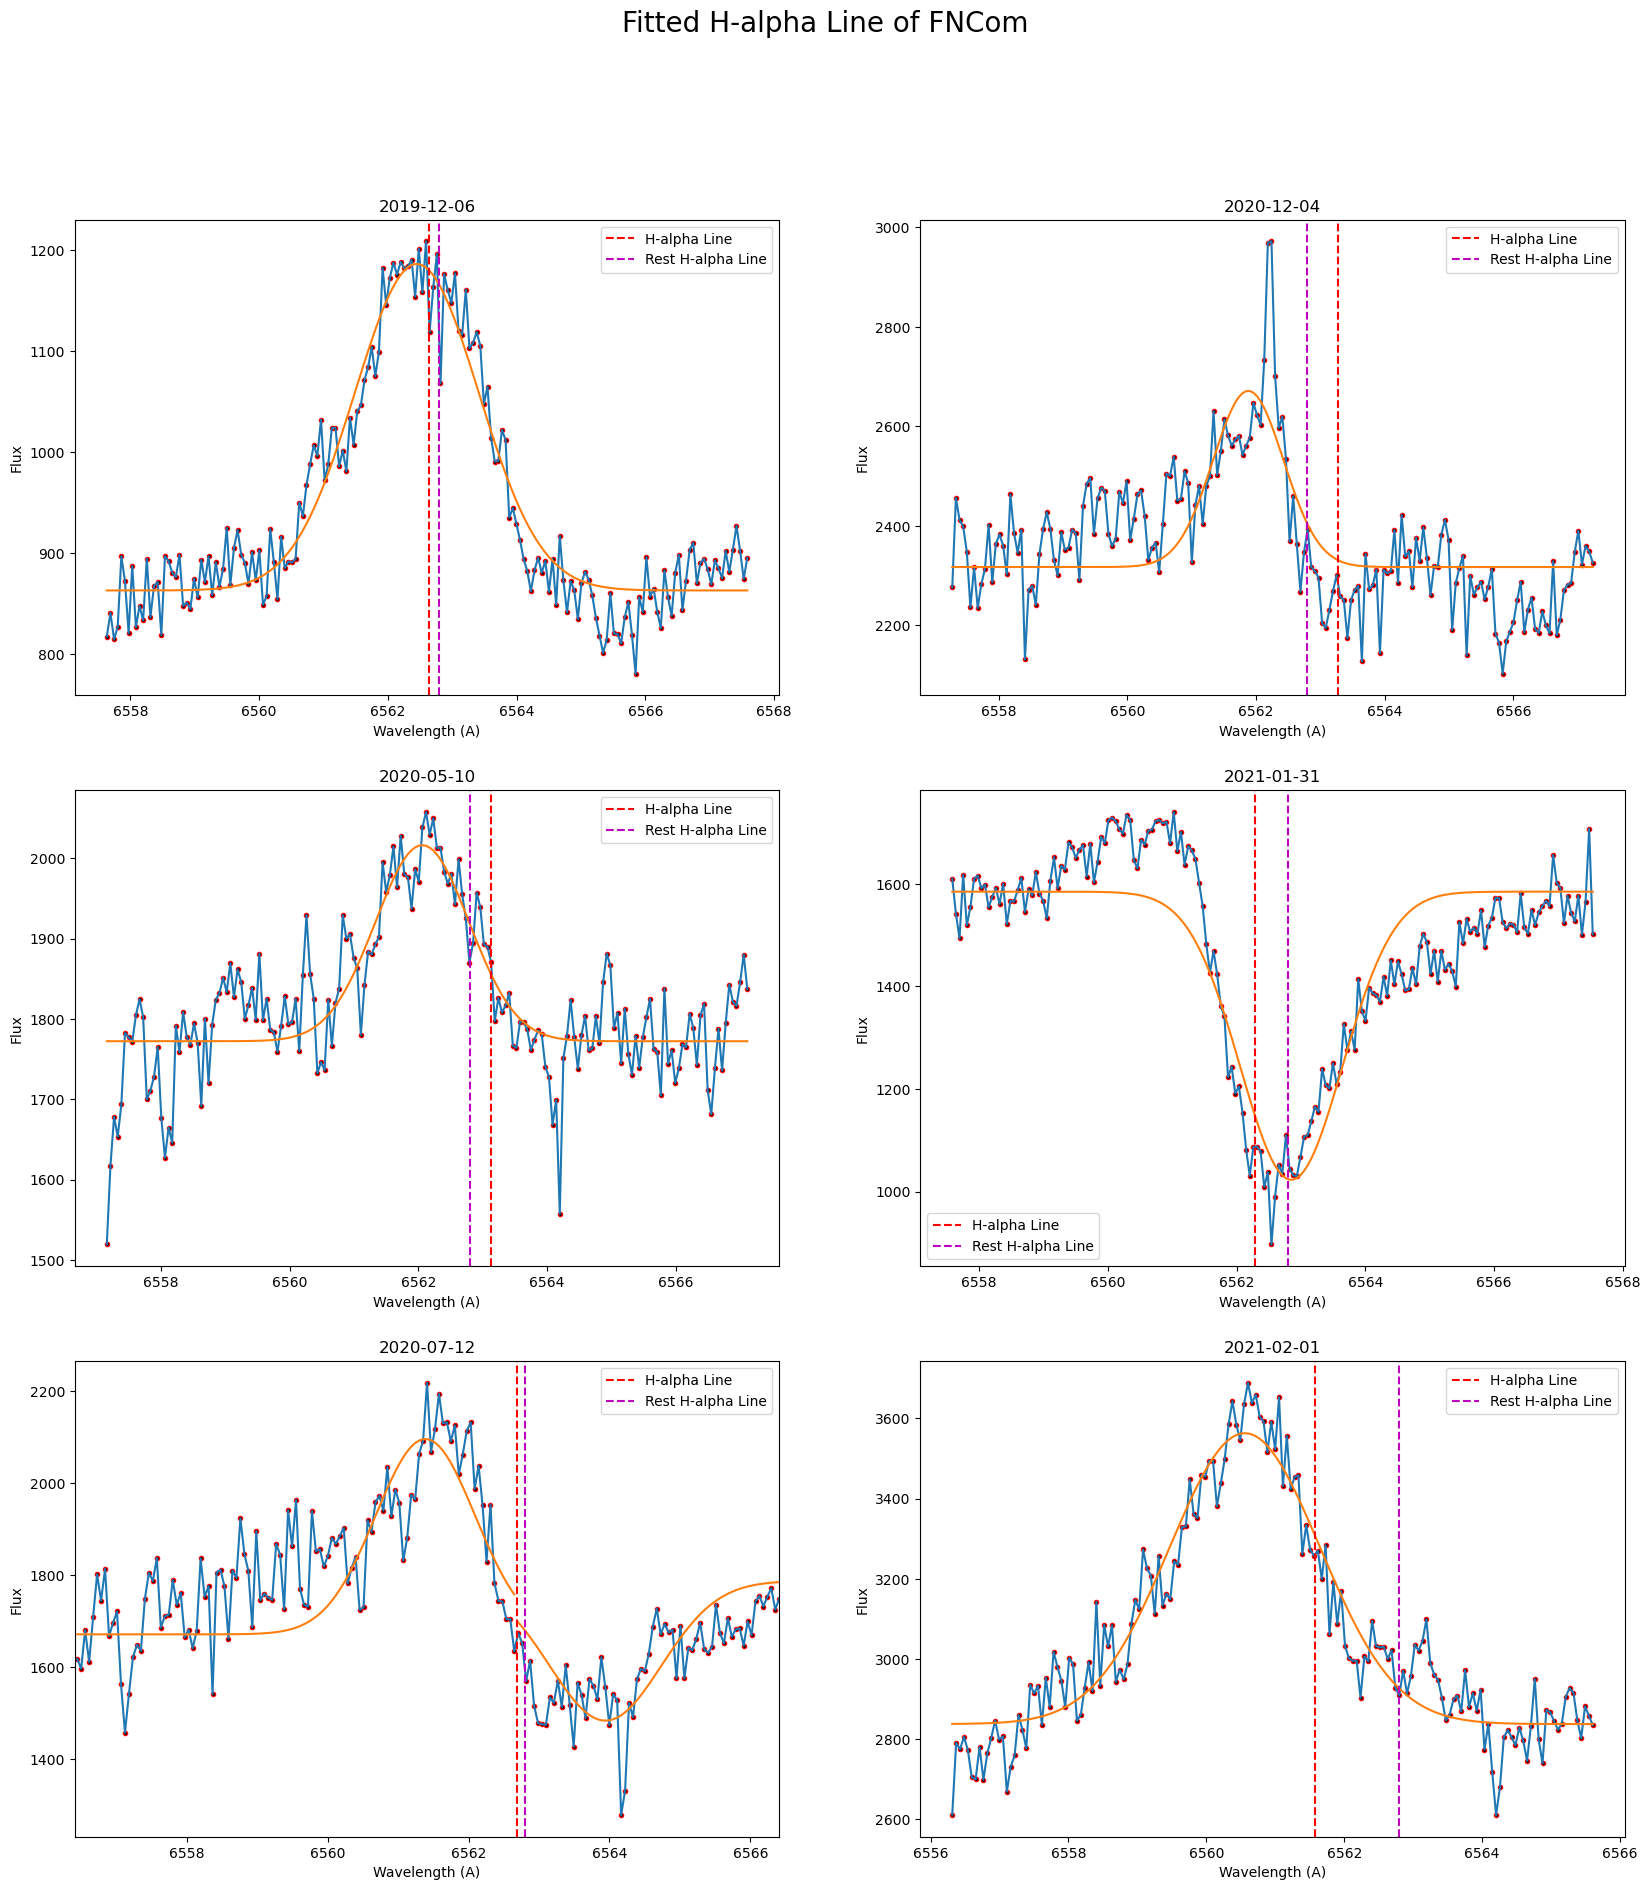

In [22]:
fig,ax = plt.subplots(numFigs, 2, figsize=(20,21))
imageName = "Fitted H-alpha Line of " + star + ".png"
fig.suptitle("Fitted H-alpha Line of " + star, fontsize = 20)

ax[0][0].set_title(date[0])
ax[0][0].plot(wavelength_Ha, flux_Ha, 'ko', ms = 3, mec = 'r')
ax[0][0].plot(wavelength_Ha, flux_Ha)
ax[0][0].plot(wavelength_Ha, fit_flux_Ha)
ax[0][0].axvline(lines_ha[0], color = 'r', ls = '--', label = 'H-alpha Line')
ax[0][0].axvline(6562.8, color = 'm', ls = '--', label = 'Rest H-alpha Line')
ax[0][0].set_ylabel('Flux')
ax[0][0].set_xlabel('Wavelength (A)')
ax[0][0].legend()

ax[1][0].set_title(date[1])
ax[1][0].plot(wavelength_Ha2, flux_Ha2, 'ko', ms = 3, mec = 'r')
ax[1][0].plot(wavelength_Ha2, flux_Ha2)
ax[1][0].plot(wavelength_Ha2, fit_flux_Ha2)
ax[1][0].axvline(lines_ha[1], color = 'r', ls = '--', label = 'H-alpha Line')
ax[1][0].axvline(6562.8, color = 'm', ls = '--', label = 'Rest H-alpha Line')
ax[1][0].set_ylabel('Flux')
ax[1][0].set_xlabel('Wavelength (A)')
ax[1][0].legend()

ax[2][0].set_title(date[2])
ax[2][0].plot(wavelength_Ha3, flux_Ha3, 'ko', ms = 3, mec = 'r')
ax[2][0].plot(wavelength_Ha3, flux_Ha3)
#ax[2][0].plot(wavelength_Ha3, fit_flux_Ha3)
#ax[2][0].plot(wavelength_Ha3b, fit_flux_Ha3b, color = 'tab:orange')
ax[2][0].plot(wavelength_Ha3_1, fit_flux_Ha3_1)
ax[2][0].plot(wavelength_Ha3b_1, fit_flux_Ha3b_1, color = 'tab:orange')
ax[2][0].axvline(lines_ha[2], color = 'r', ls = '--', label = 'H-alpha Line')
ax[2][0].axvline(6562.8, color = 'm', ls = '--', label = 'Rest H-alpha Line')
#ax[2][0].axvline(6562.4, color = 'magenta')
ax[2][0].set_xlim(lims[2][0], lims[2][1])
ax[2][0].set_ylabel('Flux')
ax[2][0].set_xlabel('Wavelength (A)')
ax[2][0].legend()

ax[0][1].set_title(date[3])
ax[0][1].plot(wavelength_Ha4, flux_Ha4, 'ko', ms = 3, mec = 'r')
ax[0][1].plot(wavelength_Ha4, flux_Ha4)
ax[0][1].plot(wavelength_Ha4, fit_flux_Ha4)
ax[0][1].axvline(lines_ha[3], color = 'r', ls = '--', label = 'H-alpha Line')
ax[0][1].axvline(6562.8, color = 'm', ls = '--', label = 'Rest H-alpha Line')
ax[0][1].set_ylabel('Flux')
ax[0][1].set_xlabel('Wavelength (A)')
ax[0][1].legend()

ax[1][1].set_title(date[4])
ax[1][1].plot(wavelength_Ha5, flux_Ha5, 'ko', ms = 3, mec = 'r')
ax[1][1].plot(wavelength_Ha5, flux_Ha5)
ax[1][1].plot(wavelength_Ha5, fit_flux_Ha5)
ax[1][1].axvline(lines_ha[4], color = 'r', ls = '--', label = 'H-alpha Line')
ax[1][1].axvline(6562.8, color = 'm', ls = '--', label = 'Rest H-alpha Line')
ax[1][1].set_ylabel('Flux')
ax[1][1].set_xlabel('Wavelength (A)')
ax[1][1].legend()

ax[2][1].set_title(date[5])
ax[2][1].plot(wavelength_Ha6, flux_Ha6, 'ko', ms = 3, mec = 'r')
ax[2][1].plot(wavelength_Ha6, flux_Ha6)
ax[2][1].plot(wavelength_Ha6, fit_flux_Ha6)
ax[2][1].axvline(lines_ha[5], color = 'r', ls = '--', label = 'H-alpha Line')
ax[2][1].axvline(6562.8, color = 'm', ls = '--', label = 'Rest H-alpha Line')
ax[2][1].set_ylabel('Flux')
ax[2][1].set_xlabel('Wavelength (A)')
ax[2][1].legend()

fig.savefig(imageName)

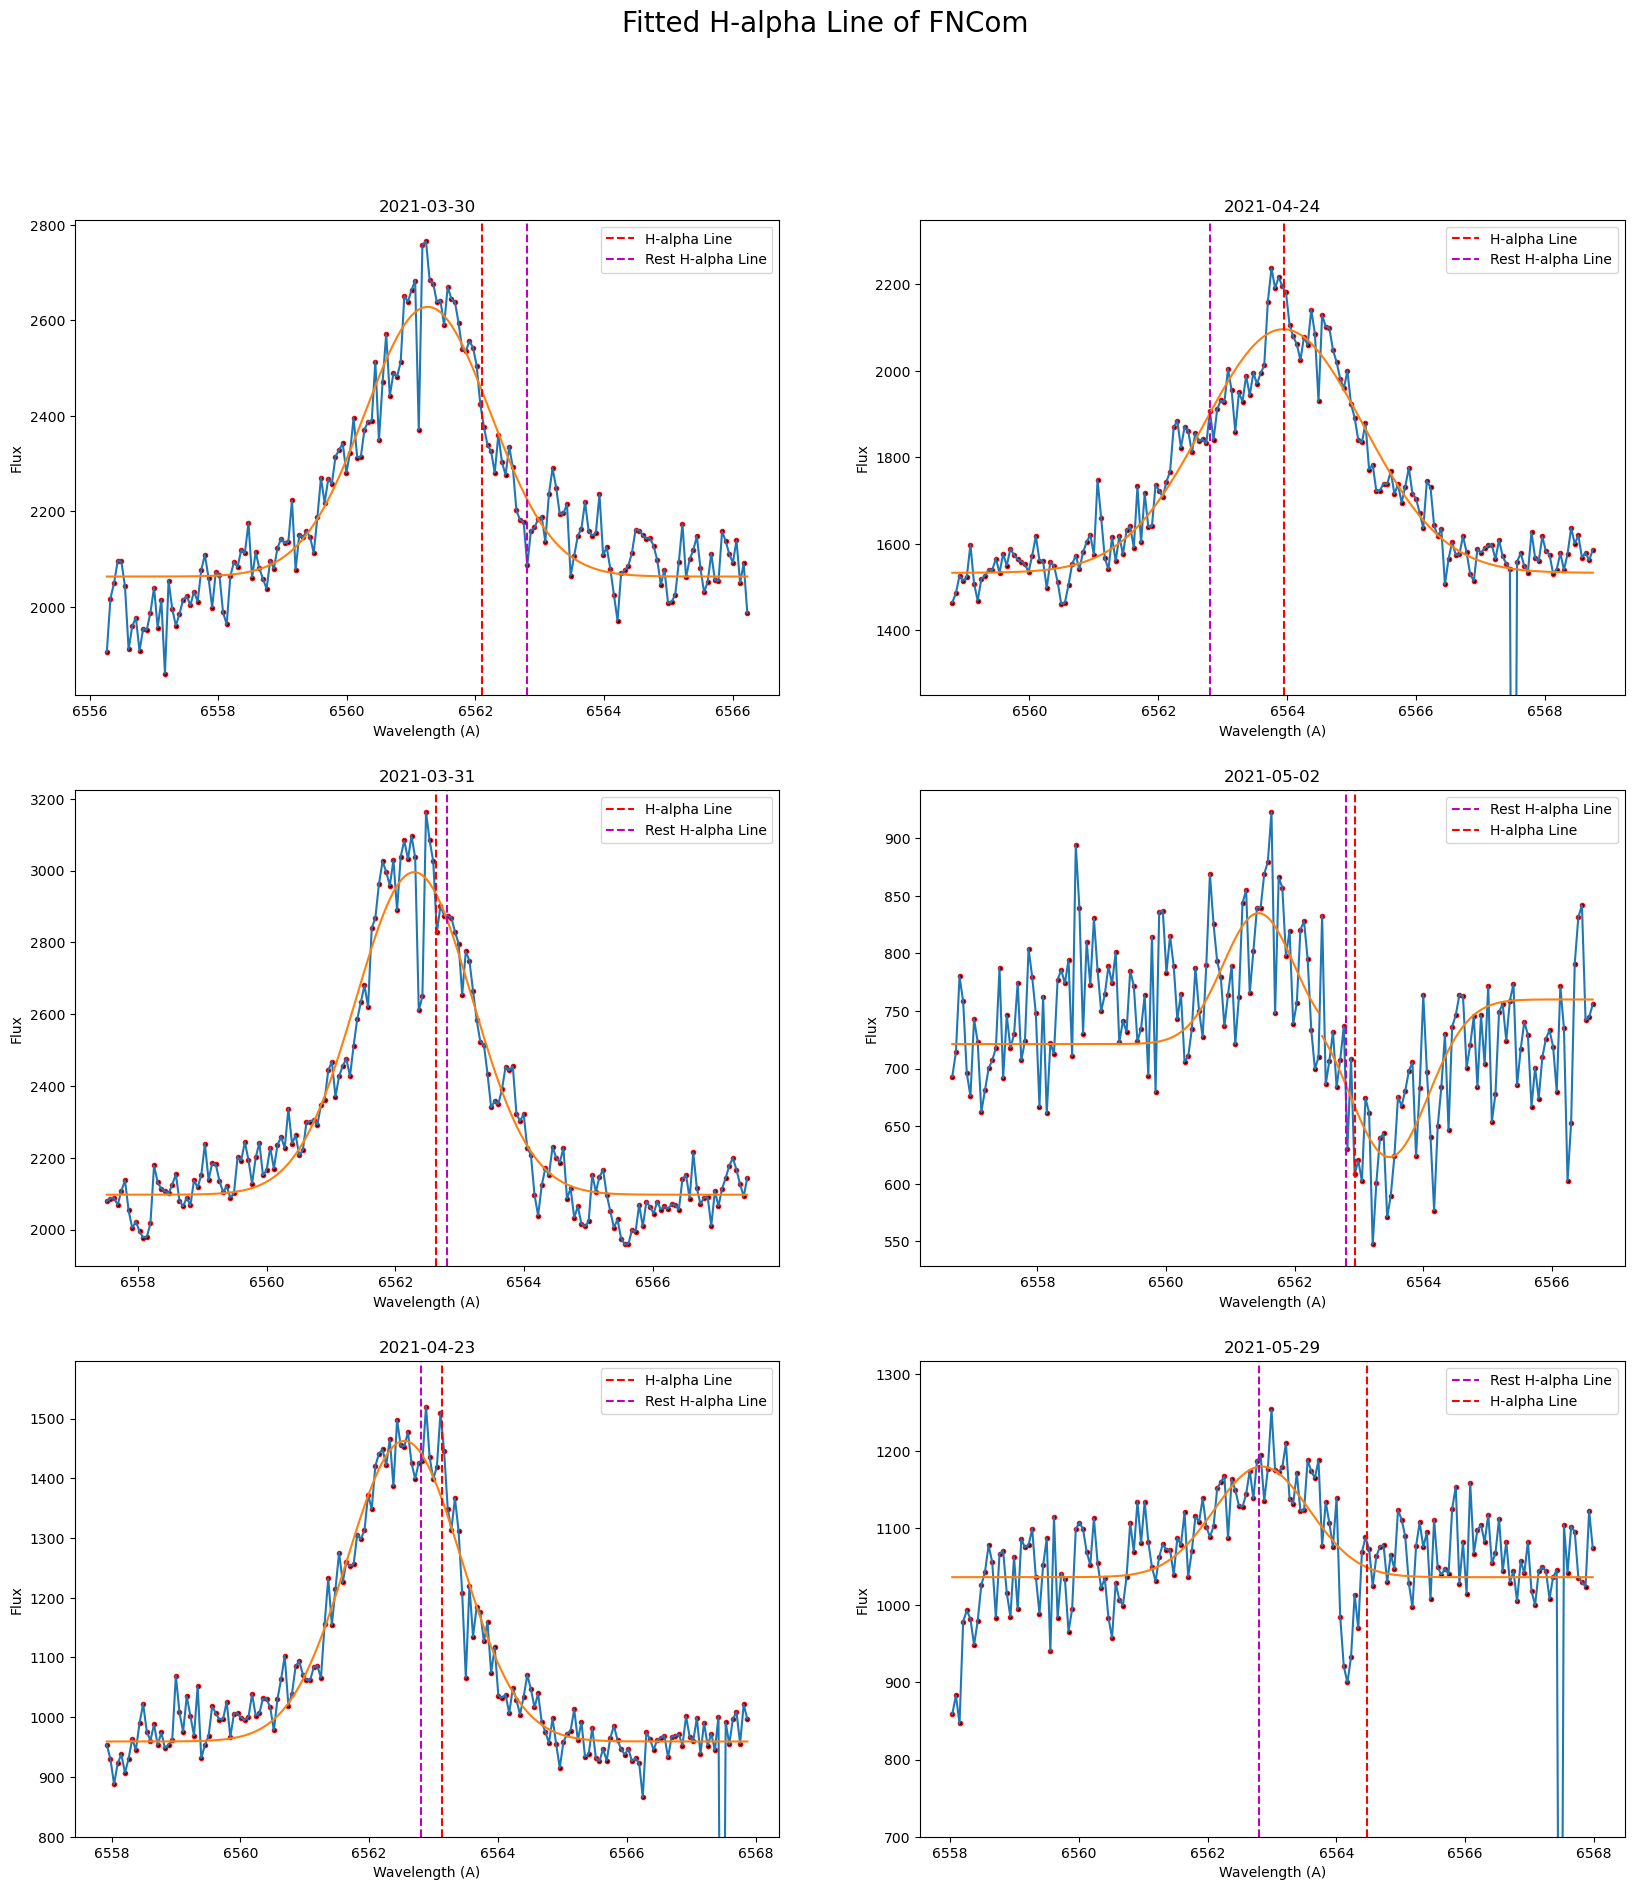

In [23]:
fig,ax = plt.subplots(numFigs, 2, figsize=(20,21))
imageName2 = "Fitted H-alpha Line of " + star + "(1).png"

fig.suptitle("Fitted H-alpha Line of " + star, fontsize = 20)

ax[0][0].set_title(date[6])
ax[0][0].plot(wavelength_Ha7, flux_Ha7, 'ko', ms = 3, mec = 'r')
ax[0][0].plot(wavelength_Ha7, flux_Ha7)
ax[0][0].plot(wavelength_Ha7, fit_flux_Ha7)
ax[0][0].axvline(lines_ha[6], color = 'r', ls = '--', label = 'H-alpha Line')
ax[0][0].axvline(6562.8, color = 'm', ls = '--', label = 'Rest H-alpha Line')
ax[0][0].set_ylabel('Flux')
ax[0][0].set_xlabel('Wavelength (A)')
ax[0][0].legend()

ax[1][0].set_title(date[7])
ax[1][0].plot(wavelength_Ha8, flux_Ha8, 'ko', ms = 3, mec = 'r')
ax[1][0].plot(wavelength_Ha8, flux_Ha8)
ax[1][0].plot(wavelength_Ha8, fit_flux_Ha8)
ax[1][0].axvline(lines_ha[7], color = 'r', ls = '--', label = 'H-alpha Line')
ax[1][0].axvline(6562.8, color = 'm', ls = '--', label = 'Rest H-alpha Line')
ax[1][0].set_ylabel('Flux')
ax[1][0].set_xlabel('Wavelength (A)')
ax[1][0].legend()

ax[2][0].set_title(date[8])
ax[2][0].plot(wavelength_Ha9, flux_Ha9, 'ko', ms = 3, mec = 'r')
ax[2][0].plot(wavelength_Ha9, flux_Ha9)
ax[2][0].plot(wavelength_Ha9, fit_flux_Ha9)
ax[2][0].axvline(lines_ha[8], color = 'r', ls = '--', label = 'H-alpha Line')
ax[2][0].axvline(6562.8, color = 'm', ls = '--', label = 'Rest H-alpha Line')
ax[2][0].set_ylim(bottom = 800)
ax[2][0].set_ylabel('Flux')
ax[2][0].set_xlabel('Wavelength (A)')
ax[2][0].legend()

ax[0][1].set_title(date[9])
ax[0][1].plot(wavelength_Ha10, flux_Ha10, 'ko', ms = 3, mec = 'r')
ax[0][1].plot(wavelength_Ha10, flux_Ha10)
ax[0][1].plot(wavelength_Ha10, fit_flux_Ha10)
ax[0][1].axvline(lines_ha[9], color = 'r', ls = '--', label = 'H-alpha Line')
ax[0][1].set_ylim(bottom = 1250)
ax[0][1].axvline(6562.8, color = 'm', ls = '--', label = 'Rest H-alpha Line')
ax[0][1].set_ylabel('Flux')
ax[0][1].set_xlabel('Wavelength (A)')
ax[0][1].legend()

ax[1][1].set_title(date[10])
ax[1][1].plot(wavelength_Ha11, flux_Ha11, 'ko', ms = 3, mec = 'r')
ax[1][1].plot(wavelength_Ha11, flux_Ha11)
#ax[1][1].plot(wavelength_Ha11, fit_flux_Ha11)
#ax[1][1].plot(wavelength_Ha11b, fit_flux_Ha11b)
ax[1][1].plot(wavelength_Ha11_1, fit_flux_Ha11_1)
ax[1][1].plot(wavelength_Ha11b_1, fit_flux_Ha11b_1, color = 'tab:orange')
#ax[1][1].axvline(6562.4, color = 'magenta')
ax[1][1].axvline(6562.8, color = 'm', ls = '--', label = 'Rest H-alpha Line')
ax[1][1].axvline(lines_ha[10], color = 'r', ls = '--', label = 'H-alpha Line')
ax[1][1].set_ylabel('Flux')
ax[1][1].set_xlabel('Wavelength (A)')
ax[1][1].legend()

ax[2][1].set_title(date[11])
ax[2][1].plot(wavelength_Ha12, flux_Ha12, 'ko', ms = 3, mec = 'r')
ax[2][1].plot(wavelength_Ha12, flux_Ha12)
ax[2][1].plot(wavelength_Ha12, fit_flux_Ha12)
ax[2][1].axvline(6562.8, color = 'm', ls = '--', label = 'Rest H-alpha Line')
ax[2][1].axvline(lines_ha[11], color = 'r', ls = '--', label = 'H-alpha Line')
ax[2][1].set_ylim(bottom = 700)
ax[2][1].set_ylabel('Flux')
ax[2][1].set_xlabel('Wavelength (A)')
ax[2][1].legend()

#fig.savefig(imageName2)

In [24]:
def sine_model(x, amplitude, frequency, phase, offset):
    return amplitude * np.sin(frequency * x + phase) + offset


initial_guess = [40, (2/5) * np.pi, 1, av_RV]  # Initial guess for the parameters
params, params_covariance = curve_fit(sine_model, BJDs[3:-1], RVs[3:-1], p0=initial_guess)
print(BJDs[-1])

print(params)
est_time = np.arange(BJDs[0], BJDs[-1], 1)
est_orbit = sine_model(est_time, params[0], params[1], params[2], params[3])
#print(est_time)'''

print(BJDs[-1] - BJDs[0])

2459364.665780637
[ 22.15706761   1.25666217 -52.03898109  -2.24824559]
540.6575253480114


In [50]:
#Spectral classifications

RV_normal = [RVs[0], RVs[7], RVs[9]]
BJDs_normal = [BJDs[0], BJDs[7], BJDs[9]]

RV_double = [RVs[2], RVs[10]]
BJDs_double = [BJDs[2], BJDs[10]]

RV_blue = [RVs[1], RVs[3], RVs[5], RVs[6], RVs[8], RVs[11]]
BJDs_blue = [BJDs[1], BJDs[3], BJDs[5], BJDs[6], BJDs[8], BJDs[11]]
#RV_absorbtion = [RV[4]]

C:\Users\astro\AppData\Local\Temp\ipykernel_20980\1172302723.py:9: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ko" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(BJDs_normal, RV_normal, 'ko', color = 'deeppink', marker = '*', ms = 10, label = 'Normal Ha Emission')
C:\Users\astro\AppData\Local\Temp\ipykernel_20980\1172302723.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  ax.plot(BJDs_normal, RV_normal, 'ko', color = 'deeppink', marker = '*', ms = 10, label = 'Normal Ha Emission')
C:\Users\astro\AppData\Local\Temp\ipykernel_20980\1172302723.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  ax.plot(BJDs_double, RV_double, 'ko', color = 'y', ms = 10, label = 'Double Peaks')
C:\Users\ast

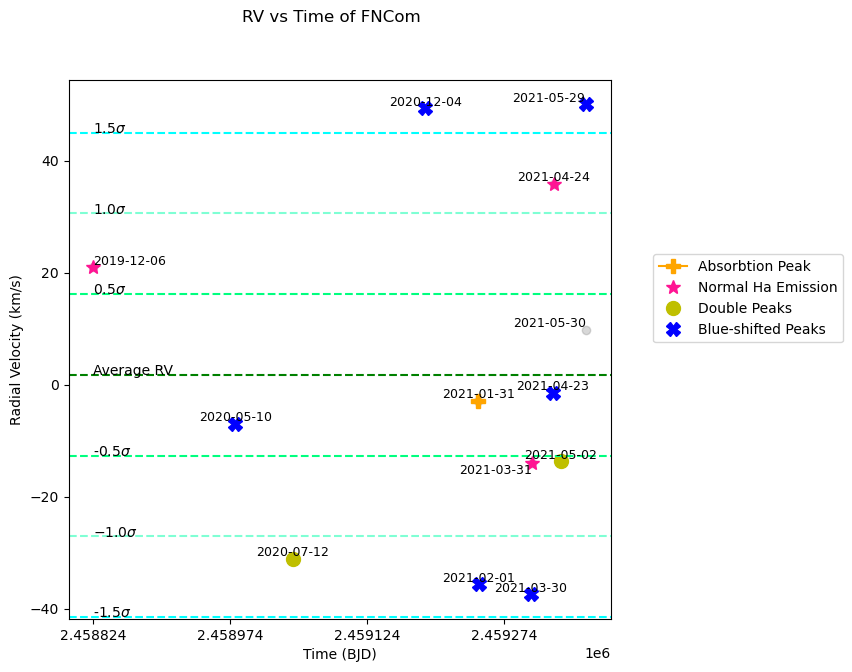

In [89]:
fig, ax = plt.subplots(1, figsize = (7, 7))

fig.suptitle("RV vs Time of " + star)
#ax.plot(est_time, est_orbit, label='Fitted sine curve', color = 'pink', ls = '--')
#ax.scatter(BJDs[0:12], RVs[0:12]) #'ko', ms = 3, mec = 'r')
ax.scatter(BJDs, RVs, alpha = 0.3, color = 'grey')

ax.plot(BJDs[4], RVs[4], color = 'orange', marker = 'P', ms = 10, label = 'Absorbtion Peak')
ax.plot(BJDs_normal, RV_normal, 'ko', color = 'deeppink', marker = '*', ms = 10, label = 'Normal Ha Emission')
ax.plot(BJDs_double, RV_double, 'ko', color = 'y', ms = 10, label = 'Double Peaks')
ax.plot(BJDs_blue, RV_blue, 'ko', color = 'b', marker = 'X', ms = 10, label = 'Blue-shifted Peaks')
ax.axhline(av_RV, ls = '--', color = 'g'), #label = 'Average RV')
ax.axhline(av_RV + RV_STD, ls = '--', color = 'aquamarine')
ax.axhline(av_RV - RV_STD, ls = '--', color = 'aquamarine')
ax.axhline(av_RV + 0.5*RV_STD, ls = '--', color = 'springgreen')
ax.axhline(av_RV - 0.5*RV_STD, ls = '--', color = 'springgreen')
ax.axhline(av_RV + 1.5*RV_STD, ls = '--', color = 'cyan')
ax.axhline(av_RV - 1.5*RV_STD, ls = '--', color = 'cyan')
'''
for i, label in enumerate(date[0:12]):
    #print(label)
    plt.text(BJDs[i], RVs[i], label, fontsize=9, ha='center', va = 'bottom')
'''

#Labels
ax.text(BJDs[0], RVs[0], date[0], fontsize=9, ha='left', va = 'bottom')
ax.text(BJDs[1], RVs[1], date[1], fontsize=9, ha='center', va = 'bottom')
ax.text(BJDs[2], RVs[2], date[2], fontsize=9, ha='center', va = 'bottom')
ax.text(BJDs[3], RVs[3], date[3], fontsize=9, ha='center', va = 'bottom')
ax.text(BJDs[4], RVs[4], date[4], fontsize=9, ha='center', va = 'bottom')
ax.text(BJDs[5], RVs[5], date[5], fontsize=9, ha='center', va = 'bottom')
ax.text(BJDs[6], RVs[6], date[6], fontsize=9, ha='center', va = 'bottom')
ax.text(BJDs[7], RVs[7], date[7], fontsize=9, ha='right', va = 'top')
ax.text(BJDs[8], RVs[8], date[8], fontsize=9, ha='center', va = 'bottom')
ax.text(BJDs[9], RVs[9], date[9], fontsize=9, ha='center', va = 'bottom')
ax.text(BJDs[10], RVs[10], date[10], fontsize=9, ha='center', va = 'bottom')
ax.text(BJDs[11], RVs[11], date[11], fontsize=9, ha='right', va = 'bottom')
ax.text(BJDs[12], RVs[12], date[12], fontsize=9, ha='right', va = 'bottom')

#ax.text(0.5, 0.5, r'matplotlib')
#ax.text(5, av_RV, 'Average RV', fontsize=9, ha='center', va = 'bottom')
ax.text(BJDs[0], av_RV, r'Average RV', fontsize=10)#transform=ax.transAxes)
ax.text(BJDs[0], av_RV + 0.5*RV_STD, r'$0.5\sigma$', fontsize=10)
ax.text(BJDs[0], av_RV - 0.5*RV_STD, r'-$0.5\sigma$', fontsize=10)
ax.text(BJDs[0], av_RV + RV_STD, r'$1.0\sigma$', fontsize=10)
ax.text(BJDs[0], av_RV - RV_STD, r'$-1.0\sigma$', fontsize=10)
ax.text(BJDs[0], av_RV + 1.5*RV_STD, r'$1.5\sigma$', fontsize=10)
ax.text(BJDs[0], av_RV - 1.5*RV_STD, r'-$1.5\sigma$', fontsize=10)
ax.set_ylabel('Radial Velocity (km/s)')
ax.set_xlabel('Time (BJD)')
ax.set_xticks(np.arange(int(min(BJDs)), int(max(BJDs)) + 1, 150))
ax.legend(bbox_to_anchor =(1.44,0.5), loc='lower right')


In [ ]:
'''
#Sample data
x = [1, 2, 3, 4, 5]
y = [10, 20, 25, 30, 40]
labels = ['A', 'B', 'C', 'D', 'E']

# Create scatter plot
plt.scatter(x, y)

# Label each point
for i, label in enumerate(labels):
    plt.text(x[i], y[i], label, fontsize=9, ha='right')

# Show plot
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Labels')
plt.show()
'''

In [ ]:
A_Ha, mu_Ha, sigma_Ha, B_Ha = popt_Ha
A_Ha2, mu_Ha2, sigma_Ha2, B_Ha2 = popt_Ha2
A_Ha3, mu_Ha3, sigma_Ha3, B_Ha3 = popt_Ha3
A_Ha4, mu_Ha4, sigma_Ha4, B_Ha4 = popt_Ha4
A_Ha5, mu_Ha5, sigma_Ha5, B_Ha5 = popt_Ha5
A_Ha6, mu_Ha6, sigma_Ha6, B_Ha6 = popt_Ha6

A_Ha7, mu_Ha7, sigma_Ha7, B_Ha7 = popt_Ha7
A_Ha8, mu_Ha8, sigma_Ha8, B_Ha8 = popt_Ha8
A_Ha9, mu_Ha_9, sigma_Ha_9, B_Ha_9 = popt_Ha9
A_Ha10, mu_Ha10, sigma_Ha10, B_Ha10 = popt_Ha10
A_Ha11, mu_Ha11, sigma_Ha11, B_Ha11 = popt_Ha11
A_Ha12, mu_Ha12, sigma_Ha12, B_Ha12 = popt_Ha12


### 6) Lets take a look at best-fit value for $\mu$. This tells you the observed central wavelength of the H-alpha line. This allows us to compute the radial velocity of our star by comparing it to the rest-frame wavelength of H-alpha. Recall that 
### $$z= \frac{v}{c}= \frac{\lambda_{obs}-\lambda_{emit}}{\lambda_{emit}}$$
### where z is redshift, v is the radial velocity of the star, c is the speed of light, and $\lambda_{obs}$ and $\lambda_{emit}$ are the observed and rest frame wavelengths of a line, respectively. 

### Use this info to compute the radial velocity of your star from the H-alpha line. Note that later we will use many lines to fit the RV much more precisely, but this is a first pass to get an approximate redshift for our star.  

In [ ]:
Z_Ha = (mu_Ha - l_ha)/l_ha
Z_Ha2 = (mu_Ha2 - l_ha)/l_ha
Z_Ha3 = (mu_Ha3 - l_ha)/l_ha
v_Ha = Z_Ha * c





### 7) Lets find the equivalent width of the H-alpha line. This is a useful way to measure the line strength of this feature, which is an indicator of the magnetic field strength in the star. 

$$EW= \int_{\lambda_1}^{\lambda_2}{\frac{Fc-Fs(\lambda)}{Fc}d\lambda}$$
where Fc is the continuum flux (B from your gaussian fit) and Fs is observed flux inside the emission/absorption feature 

### Therefore, you must integrate to find the EW. You might use your actual spectral data and do a numerical integration, or you could integrate the gaussian function you fit to your line profile. Think about which approach would work best. (Recall that we did some numerical integration in Lab 3, which you may find helpful to look back at). Remember to include units when you report your measurement

In [ ]:
#Integrating the line
def intFunction(Fc, Fs):
    y =  (Fc - Fs)/Fc
    return y

EW_Ha = scipy.integrate.trapezoid(intFunction(B_Ha, flux_Ha), x = wavelength_Ha)
EW_Ha_Gauss = scipy.integrate.trapezoid(intFunction(B_Ha, fit_flux_Ha), x = wavelength_Ha)

### 8) Now lets check and see if we can see a lithium feature in our spectra. Lithium is typically destroyed by convection in giant stars, so any significant lithium lines would be interesting to note. Lets check to see if there is a line in the location we would expect for Lithium, 6707.8 Angstroms in the rest frame. Remember that this line will be slightly shifted from the rest frame due to the radial velocity of the star. A good way to help identify your lithium line is to check a high resolution solar Atlas and look at your region of interest (5-10 Angstroms on either side of the line you want to find). https://bass2000.obspm.fr/solar_spect.php

### Make a plot zoomed in on the lithium feature in your star. What we would like to know is whether lithium looks much stronger or much weaker than the lithium line in the sun. One way you can assess the line strength by eye is to compare the strength of the lithium feature to other nearby lines ( a line ratio). Right next to the lithium feature is a series of several Fe I lines. Compare the line strength of the Li line to the Fe features... Is lithium stronger, weaker, or about the same? How about in the solar atlas-- is lithium much stronger, much weaker, or about the same? 

In [ ]:
def integrator(popt):
    upperlam = popt[1]+2
    lowerlam = popt[1]-2
    IntHa2 = scipy.integrate.quad(gauss, lowerlam, upperlam, args = (popt[0], popt[1], popt[2],popt[3]))
    Int1 = (upperlam - lowerlam)
    B = popt[3]
    Int2 = IntHa[0]/B
    IntHA = Int1-Int2
    return IntHA

In [ ]:
for i in range()

In [ ]:
o_Li = 40
l_Li= 6707.8

fig,ax = plt.subplots(1)

ax.plot(spec['wav'][o_Li],spec['flux'][o_Li])
ax.plot([l_Li, l_Li], (min(spec['flux'][o_Li]), max(spec['flux'][o_Li])), '--')
ax.set_ylabel('Flux')
ax.set_xlabel('Wavelength (A)')

In [ ]:
#Lithium

Li_est = l_Li * (Z_Ha+ 1)
Li_est3 = l_Li * (Z_Ha3 + 1)
#l_Fe1 = 6703.3805
l_Fe2 = 6710.3191
Fe_est = l_Fe2 * (Z_Ha + 1)
Fe_est3 = l_Fe2 * (Z_Ha3 + 1)
print(Li_est)

l_Mn = 6709.0154
Li_est = l_Mn * (Z_Ha + 1)
Li_est2 = 6708
Li_est3 = l_Mn * (Z_Ha3 + 1)

fig,ax = plt.subplots(1)

ax.plot(spec['wav'][o_Li],spec['flux'][o_Li])
ax.set_ylabel('Flux')
ax.set_xlabel('Wavelength (A)')
ax.plot([Li_est, Li_est],(min(spec['flux'][o_Li]), max(spec['flux'][o_Li])), '--g', label = 'Estimated Shifted LI Line')
ax.plot([l_Li, l_Li], (min(spec['flux'][o_Li]), max(spec['flux'][o_Li])), '--', label = "Rest Li Line")

''' ax.plot([Fe_est, Fe_est], (min(spec['flux'][o_Li]), max(spec['flux'][o_Li])), 'm--')
ax.plot([l_Fe2, l_Fe2], (min(spec['flux'][o_Li]), max(spec['flux'][o_Li])), 'r--', label = 'Rest Fe')
ax.plot([Li_est, Li_est],(min(spec['flux'][o_Li]), max(spec['flux'][o_Li])), '--g', label = 'Shifted Li Line')
ax.plot([l_Li, l_Li], (min(spec['flux'][o_Li]), max(spec3['flux'][o_Li])), '--', label = "Rest Li Line")'''


ax.set_xlim(l_Li-5, l_Li+5)
ax.set_ylim(700, 1000)
ax.legend()

'''fig,ax = plt.subplots(1)
ax.plot(spec2['wav'][o_Li],spec2['flux'][o_Li])
ax.set_ylabel('Flux')
ax.set_xlabel('Wavelength (A)')
ax.plot([Mn_est2, Mn_est2],(min(spec2['flux'][o_Li]), max(spec2['flux'][o_Li])), '--m', label = 'Shifted Mn Line')
ax.plot([l_Mn, l_Mn], (min(spec2['flux'][o_Li]), max(spec2['flux'][o_Li])), '--r', label = "Rest Mn Line")
ax.set_xlim(l_Li-5, l_Li+5)
ax.set_ylim(1500, 2100)
ax.legend()

fig,ax = plt.subplots(1)
ax.plot(spec2['wav'][o_Li],spec2['flux'][o_Li])
ax.plot([Fe_est3, Fe_est3], (min(spec3['flux'][o_Li]), max(spec3['flux'][o_Li])), 'c--', label = "shifted Fe")
ax.plot([l_Fe2, l_Fe2], (min(spec3['flux'][o_Li]), max(spec3['flux'][o_Li])), 'r--', label = 'Rest Fe')
ax.plot([Li_est3, Li_est3],(min(spec3['flux'][o_Li]), max(spec3['flux'][o_Li])), '--g', label = 'Shifted Li Line')
ax.plot([l_Li, l_Li], (min(spec3['flux'][o_Li]), max(spec3['flux'][o_Li])), '--', label = "Rest Li Line")
ax.plot([Mn_est3, Mn_est3],(min(spec3['flux'][o_Li]), max(spec3['flux'][o_Li])), '--m', label = 'Shifted Mn Line')
ax.plot([l_Mn, l_Mn], (min(spec3['flux'][o_Li]), max(spec3['flux'][o_Li])), '--y', label = "Rest Mn Line")

ax.set_xlim(l_Li-5, l_Li+5)
ax.set_ylim(1500, 2100)
ax.legend() '''


In [ ]:
fig,ax = plt.subplots(numFigs, 2, figsize=(20,21))


ax[0][0].set_title('Lithium spectrum of FNCom at 2019-12-06')
ax[0][0].plot(spec['wav'][o_Li],spec['flux'][o_Li])
ax[0][0].set_ylabel('Flux')
ax[0][0].plot([l_Li, l_Li], (min(spec['flux'][o_Li]), max(spec['flux'][o_Li])), '--')
ax[0][0].set_xlim(l_Li-5, l_Li+5)
ax[0][0].set_xlabel('Wavelength (A)')
ax[0][0].set_ylim(700, 1000)

ax[1][0].set_title('Lithium spectrum of FNCom at 2020-05-10')
ax[1][0].plot(spec2['wav'][o_Li],spec2['flux'][o_Li])
ax[1][0].set_ylabel('Flux')
ax[1][0].plot([l_Li, l_Li], (min(spec2['flux'][o_Li]), max(spec2['flux'][o_Li])), '--')
ax[1][0].set_xlim(l_Li-5, l_Li+5)
ax[1][0].set_ylim(1500, 2100)
ax[1][0].set_xlabel('Wavelength (A)')

ax[2][0].set_title('Lithium spectrum of FNCom at 2020-07-12')
ax[2][0].plot(spec3['wav'][o_Li],spec3['flux'][o_Li])
ax[2][0].set_ylabel('Flux')
ax[2][0].set_xlim(l_Li-5, l_Li+5)
ax[2][0].plot([l_Li, l_Li], (min(spec3['flux'][o_Li]), max(spec3['flux'][o_Li])), '--')
ax[2][0].set_ylim(1400, max(spec3['flux'][o_Li]))
ax[2][0].set_xlabel('Wavelength (A)')

ax[0][1].set_title('Lithium spectrum of FNCom at 2020-12-04')
ax[0][1].plot(spec4['wav'][o_Li],spec4['flux'][o_Li])
ax[0][1].set_ylabel('Flux')
ax[0][1].plot([l_Li, l_Li], (min(spec4['flux'][o_Li]), max(spec4['flux'][o_Li])), '--')
ax[0][1].set_xlim(l_Li-5, l_Li+8)
ax[0][1].set_ylim(2100,  2700)

ax[1][1].set_title('Lithium spectrum of FNCom at 2021-01-31')
ax[1][1].plot(spec5['wav'][o_Li],spec5['flux'][o_Li])
ax[1][1].set_ylabel('Flux')
ax[1][1].plot([l_Li, l_Li], (min(spec5['flux'][o_Li]), max(spec5['flux'][o_Li])), '--')
ax[1][1].set_xlim(l_Li-7, l_Li+3)
ax[1][1].set_ylim(1400,  1800)

ax[2][1].set_title('Lithium spectrum of FNCom at 2021-02-01')
ax[2][1].plot(spec6['wav'][o_Li],spec6['flux'][o_Li])
ax[2][1].set_ylabel('Flux')
ax[2][1].set_xlim(l_Li-7, l_Li+3)
ax[2][1].plot([l_Li, l_Li], (min(spec6['flux'][o_Li]), max(spec6['flux'][o_Li])), '--')
ax[2][1].set_ylim(2500,  3100)

In [ ]:
fig,ax = plt.subplots(numFigs, 2, figsize=(20,21))
ax[0][0].set_title('Lithium spectrum of FNCom at 2021-03-30')
ax[0][0].plot(spec7['wav'][o_Li],spec7['flux'][o_Li])
ax[0][0].set_ylabel('Flux')
ax[0][0].plot([l_Li, l_Li], (min(spec7['flux'][o_Li]), max(spec7['flux'][o_Li])), '--')
ax[0][0].set_xlim(l_Li-6, l_Li+4)
ax[0][0].set_ylim(1700, 2300)
ax[0][0].set_xlabel('Wavelength (A)')

ax[1][0].set_title('Lithium spectrum of FNCom at 2021-03-31')
ax[1][0].plot(spec8['wav'][o_Li],spec8['flux'][o_Li])
ax[1][0].set_ylabel('Flux')
ax[1][0].plot([l_Li, l_Li], (min(spec8['flux'][o_Li]), max(spec8['flux'][o_Li])), '--')
ax[1][0].set_xlim(l_Li-5, l_Li+5)
ax[1][0].set_ylim(1700, 2400)
ax[1][0].set_xlabel('Wavelength (A)')

ax[2][0].set_title('Lithium spectrum of FNCom at 2021-03-24')
ax[2][0].plot(spec9['wav'][o_Li],spec9['flux'][o_Li])
ax[2][0].set_ylabel('Flux')
ax[2][0].set_xlim(l_Li-5, l_Li+5)
ax[2][0].plot([l_Li, l_Li], (min(spec9['flux'][o_Li]), max(spec9['flux'][o_Li])), '--')
ax[2][0].set_ylim(850,1150)
ax[2][0].set_xlabel('Wavelength (A)')

ax[0][1].set_title('Lithium spectrum of FNCom at 2021-04-24')
ax[0][1].plot(spec10['wav'][o_Li],spec10['flux'][o_Li])
ax[0][1].set_ylabel('Flux')
ax[0][1].plot([l_Li, l_Li], (min(spec10['flux'][o_Li]), max(spec10['flux'][o_Li])), '--')
ax[0][1].set_xlim(l_Li-5, l_Li+5)
ax[0][1].set_ylim(1350, 1700)

ax[1][1].set_title('Lithium spectrum of FNCom at 2021-05-02')
ax[1][1].plot(spec11['wav'][o_Li],spec11['flux'][o_Li])
ax[1][1].set_ylabel('Flux')
ax[1][1].plot([l_Li, l_Li], (min(spec11['flux'][o_Li]), max(spec11['flux'][o_Li])), '--')
ax[1][1].set_xlim(l_Li-5, l_Li+5)
ax[1][1].set_ylim(600, 950)

ax[2][1].set_title('Lithium spectrum of FNCom at 2021-02-01')
ax[2][1].plot(spec12['wav'][o_Li],spec12['flux'][o_Li])
ax[2][1].set_ylabel('Flux')
ax[2][1].set_xlim(l_Li-5, l_Li+5)
ax[2][1].set_ylim(950, 1250)
ax[2][1].plot([l_Li, l_Li], (min(spec12['flux'][o_Li]), max(spec12['flux'][o_Li])), '--')


### 9) Lets take a look at barium in our stars. Barium is an s-process element that is produced inside AGB stars. Strong barium lines in a sub-subgiant would indicate the star may have been polluted by mass transfer from an AGB companion star. A well-known barium line is located at 4554 angstroms. As you did for lithium, compare the line strength of barium to some nearby lines. Are the line ratios similar to what you see in the solar spectrum? 

In [ ]:
'''o_Ba = 16
l_Ba = 4554

Ba_est = 4553.963060787716

fig,ax = plt.subplots(1)

ax.plot(spec2['wav'][o_Ba],spec2['flux'][o_Ba])
ax.plot([l_Ba, l_Ba], (min(spec2['flux'][o_Ba]), max(spec2['flux'][o_Ba])), '--')
ax.set_ylabel('Flux')
ax.set_xlabel('Wavelength (A)')

fig,ax = plt.subplots(1)

ax.plot(spec2['wav'][o_Ba],spec2['flux'][o_Ba])
ax.plot([l_Ba, l_Ba], (min(spec2['flux'][o_Ba]), max(spec2['flux'][o_Ba])), '--')
ax.set_ylabel('Flux')
ax.set_xlabel('Wavelength (A)')
ax.set_xlim(l_Ba -5, l_Ba +5) '''


### 10) If you can see a distinct barium and/or lithium feature, can you measure an equivalent width for it? This may be more challenging than fitting H-alpha, as these lines are usually much weaker and may be blended with other nearby features. 

In [ ]:
flux_Li, wavelength_Li = filterer(o_Li, 6706, 6709, spec)
popt_Li, pcov_Li = scipy.optimize.curve_fit(gauss, wavelength_Li, flux_Li,[150,6707.8,1,920])
fit_flux_Li = gauss(wavelength_Li, popt_Li[0], popt_Li[1], popt_Li[2], popt_Li[3])

flux_Li2, wavelength_Li2 = filterer(o_Li, 6707, 6709.5, spec2)
popt_Li2, pcov_Li2 = scipy.optimize.curve_fit(gauss, wavelength_Li2, flux_Li2,[300,6708,1,1900])
fit_flux_Li2 = gauss(wavelength_Li2, popt_Li2[0], popt_Li2[1], popt_Li2[2], popt_Li2[3])

flux_Li3, wavelength_Li3 = filterer(o_Li, 6706, 6709, spec3)
popt_Li3, pcov_Li2 = scipy.optimize.curve_fit(gauss, wavelength_Li3, flux_Li3,[300,6707.1,1,1800])
fit_flux_Li3 = gauss(wavelength_Li3, popt_Li3[0], popt_Li3[1], popt_Li3[2], popt_Li3[3])

flux_Li4, wavelength_Li4 = filterer(o_Li, 6707, 6709.5, spec4)
popt_Li4, pcov_Li4 = scipy.optimize.curve_fit(gauss, wavelength_Li4, flux_Li4,[400,6708.5,1,2600])
fit_flux_Li4 = gauss(wavelength_Li4, popt_Li4[0], popt_Li4[1], popt_Li4[2], popt_Li4[3])

flux_Li5, wavelength_Li5 = filterer(o_Li, 6706, 6709, spec5)
popt_Li5, pcov_Li5 = scipy.optimize.curve_fit(gauss, wavelength_Li5, flux_Li5,[300,6707.1,1,1700])
fit_flux_Li5 = gauss(wavelength_Li5, popt_Li5[0], popt_Li5[1], popt_Li5[2], popt_Li5[3])

flux_Li6, wavelength_Li6 = filterer(o_Li, 6705, 6708, spec6)
popt_Li6, pcov_Li6 = scipy.optimize.curve_fit(gauss, wavelength_Li6, flux_Li6,[500,6706.5,1,2900])
fit_flux_Li6 = gauss(wavelength_Li6, popt_Li6[0], popt_Li6[1], popt_Li6[2], popt_Li6[3])


In [ ]:
flux_Li7, wavelength_Li7 = filterer(o_Li, 6706, 6709, spec7)
popt_Li7, pcov_Li7 = scipy.optimize.curve_fit(gauss, wavelength_Li7, flux_Li7,[150,6707.8,1,920])
fit_flux_Li7 = gauss(wavelength_Li7, popt_Li7[0], popt_Li7[1], popt_Li7[2], popt_Li7[3])

flux_Li8, wavelength_Li8 = filterer(o_Li, 6706.1, 6709.5, spec8)
popt_Li8, pcov_Li8 = scipy.optimize.curve_fit(gauss, wavelength_Li8, flux_Li8,[400,6707.4,1,2100])
fit_flux_Li8 = gauss(wavelength_Li8, popt_Li8[0], popt_Li8[1], popt_Li8[2], popt_Li8[3])

flux_Li9, wavelength_Li9 = filterer(o_Li, 6706, 6710, spec9)
popt_Li9, pcov_Li8 = scipy.optimize.curve_fit(gauss, wavelength_Li9, flux_Li9,[250,6708.2,1,1025])
fit_flux_Li9 = gauss(wavelength_Li9, popt_Li9[0], popt_Li9[1], popt_Li9[2], popt_Li9[3])

flux_Li10, wavelength_Li10 = filterer(o_Li, 6707, 6711, spec10)
popt_Li10, pcov_Li10 = scipy.optimize.curve_fit(gauss, wavelength_Li10, flux_Li10,[200,6709,1,1650])
fit_flux_Li10 = gauss(wavelength_Li10, popt_Li10[0], popt_Li10[1], popt_Li10[2], popt_Li10[3])

flux_Li11, wavelength_Li11 = filterer(o_Li, 6706.5, 6709.5, spec11)
popt_Li11, pcov_Li11 = scipy.optimize.curve_fit(gauss, wavelength_Li11, flux_Li11,[200,6707.7,1,850])
fit_flux_Li11 = gauss(wavelength_Li11, popt_Li11[0], popt_Li11[1], popt_Li11[2], popt_Li11[3])

flux_Li12, wavelength_Li12 = filterer(o_Li, 6708, 6711, spec12)
popt_Li12, pcov_Li12 = scipy.optimize.curve_fit(gauss, wavelength_Li12, flux_Li12,[200,6709.3,1,1500])
fit_flux_Li12 = gauss(wavelength_Li12, popt_Li12[0], popt_Li12[1], popt_Li12[2], popt_Li12[3])


In [ ]:
fig,ax = plt.subplots(numFigs, 2, figsize=(20,21))

ax[0][0].set_title('Lithium spectrum of FNCom at 2019-12-06')
ax[0][0].plot(wavelength_Li, flux_Li, 'ko', ms = 3, mec = 'r')
ax[0][0].plot(wavelength_Li, flux_Li)
ax[0][0].plot(wavelength_Li, fit_flux_Li)
ax[0][0].set_ylabel('Flux')
ax[0][0].set_xlabel('Wavelength (A)')

ax[1][0].set_title('Lithium spectrum of FNCom at 2020-05-10')
ax[1][0].plot(wavelength_Li2, flux_Li2, 'ko', ms = 3, mec = 'r')
ax[1][0].plot(wavelength_Li2, flux_Li2)
ax[1][0].plot(wavelength_Li2, fit_flux_Li2)
ax[1][0].set_ylabel('Flux')
ax[1][0].set_xlabel('Wavelength (A)')

ax[2][0].set_title('Lithium spectrum of FNCom at 2020-07-12')
ax[2][0].plot(wavelength_Li3, flux_Li3, 'ko', ms = 3, mec = 'r')
ax[2][0].plot(wavelength_Li3, flux_Li3)
ax[2][0].plot(wavelength_Li3, fit_flux_Li3)
#ax[2][0].set_xlim(6560, 6563)
ax[2][0].set_ylabel('Flux')
ax[2][0].set_xlabel('Wavelength (A)')

ax[0][1].set_title('Lithium spectrum of FNCom at 2020-12-04')
ax[0][1].plot(wavelength_Li4, flux_Li4, 'ko', ms = 3, mec = 'r')
ax[0][1].plot(wavelength_Li4, flux_Li4)
ax[0][1].plot(wavelength_Li4, fit_flux_Li4)
ax[0][1].set_ylabel('Flux')
ax[0][1].set_xlabel('Wavelength (A)')

ax[1][1].set_title('Lithium spectrum of FNCom at 2021-01-31')
ax[1][1].plot(wavelength_Li5, flux_Li5, 'ko', ms = 3, mec = 'r')
ax[1][1].plot(wavelength_Li5, flux_Li5)
ax[1][1].plot(wavelength_Li5, fit_flux_Li5)
ax[1][1].set_ylabel('Flux')
ax[1][1].set_xlabel('Wavelength (A)')

ax[2][1].set_title('Lithium spectrum of FNCom at 2021-02-01')
ax[2][1].plot(wavelength_Li6, flux_Li6, 'ko', ms = 3, mec = 'r')
ax[2][1].plot(wavelength_Li6, flux_Li6)
ax[2][1].plot(wavelength_Li6, fit_flux_Li6)
ax[2][1].set_ylabel('Flux')
ax[2][1].set_xlabel('Wavelength (A)')


In [ ]:
fig,ax = plt.subplots(numFigs, 2, figsize=(20,21))
ax[0][0].set_title('Lithium spectrum of FNCom at 2021-03-30')
ax[0][0].plot(wavelength_Li7, flux_Li7, 'ko', ms = 3, mec = 'r')
ax[0][0].plot(wavelength_Li7, flux_Li7)
ax[0][0].plot(wavelength_Li7, fit_flux_Li7)
ax[0][0].set_ylabel('Flux')
ax[0][0].set_xlabel('Wavelength (A)')

ax[1][0].set_title('Lithium spectrum of FNCom at 2021-03-31')
ax[1][0].plot(wavelength_Li8, flux_Li8, 'ko', ms = 3, mec = 'r')
ax[1][0].plot(wavelength_Li8, flux_Li8)
ax[1][0].plot(wavelength_Li8, fit_flux_Li8)
ax[1][0].set_ylabel('Flux')
ax[1][0].set_xlabel('Wavelength (A)')

ax[2][0].set_title('Lithium spectrum of FNCom at 2021-04-23')
ax[2][0].plot(wavelength_Li9, flux_Li9, 'ko', ms = 3, mec = 'r')
ax[2][0].plot(wavelength_Li9, flux_Li9)
ax[2][0].plot(wavelength_Li9, fit_flux_Li9)
ax[2][0].set_ylabel('Flux')
ax[2][0].set_xlabel('Wavelength (A)')

ax[0][1].set_title('Lithium spectrum of FNCom at 2021-04-24')
ax[0][1].plot(wavelength_Li10, flux_Li10, 'ko', ms = 3, mec = 'r')
ax[0][1].plot(wavelength_Li10, flux_Li10)
ax[0][1].plot(wavelength_Li10, fit_flux_Li10)
ax[0][1].set_ylabel('Flux')
ax[0][1].set_xlabel('Wavelength (A)')

ax[1][1].set_title('Lithium spectrum of FNCom at 2021-05-02')
ax[1][1].plot(wavelength_Li11, flux_Li11, 'ko', ms = 3, mec = 'r')
ax[1][1].plot(wavelength_Li11, flux_Li11)
ax[1][1].plot(wavelength_Li11, fit_flux_Li11)
ax[1][1].set_ylabel('Flux')
ax[1][1].set_xlabel('Wavelength (A)')

ax[2][1].set_title('Lithium spectrum of FNCom at 2021-05-29')
ax[2][1].plot(wavelength_Li12, flux_Li12, 'ko', ms = 3, mec = 'r')
ax[2][1].plot(wavelength_Li12, flux_Li12)
ax[2][1].plot(wavelength_Li12, fit_flux_Li12)
ax[2][1].set_ylabel('Flux')
ax[2][1].set_xlabel('Wavelength (A)')


# Once you are satisfied with your calculations and plots, save plots of your H-alpha, lithium, and barium lines. Clearly mark which line is from lithium, barium, or H-alpha. Note your H-alpha equivalent width measurement somewhere on the H-alpha plot (and barium and lithium EWs if you have them). Merge all your plots into a single pdf and upload them to blackboard to complete your Lab 6 Part 1 project updated. 

## 11) If you have time, take a look at some more observations of your star. Do the equivalent widths of these lines stay similar between observations, or do they vary? You can average the EWs of the lines in each observation to determine the EW and take the standard deviation to determine an error on your measurement.
